# Prédisez la consommation d'énergie des bâtiments dans la ville de Seattle.

<div align="left">
  <img src="https://user.oc-static.com/upload/2024/09/11/17260684381511_Capture%20d%E2%80%99e%CC%81cran%202024-09-11%20a%CC%80%2017.22.25.png" width="200px">
</div>

## **Objetif**: Prédire les **émissions de CO2** et la **consommation totale d’énergie** de **bâtiments non destinés à l’habitation**

- Auteur......: **Rafael CEREZO MARTIN**
- Date........: **Décembre 2025**

# <span style="color:red"> PART 2. ANALYSE EXPLORATOIRE (EDA) </span>

**PLAN D'EXPLORATION**

Qelques pistes d'analyse :

A réaliser :
- 🎯 (9) Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

* ✅️ (2.1) Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* ✅️ (1.2.3) Mettre en evidence les différences entre les immeubles mono et multi-usages
* ✅️ (6.3) Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet.

### 📋 Prérequis

* **Environnement** : Avoir préparé un environnement virtuel Python avec tous les packages spécifiés dans la partie importation du notebook template.

### 🎯 Résultat attendu

* Le notebook template avec la partie **"Analyse exploratoire"** complétée.

### 💡 Recommandations

1. **Ciblage** : Bien lire tout d'abord l'énoncé pour se restreindre uniquement aux types pertinents de bâtiments.
2. **Détection d'anomalies** : Identifier les colonnes qui peuvent aider à repérer des bâtiments aberrants ou peu pertinents.
3. **Choix de la Target** : Il y a plusieurs colonnes candidates pouvant être une target de votre modèle. **Il faut en choisir une** pour tout le reste du projet.
4. **Analyse des Nans** : Le libellé et le contenu de certaines colonnes vous aidera à comprendre pourquoi certaines valeurs manquantes existent et ce que vous devez en faire.
5. **Visualisation** : Bien choisir le type de graphique en fonction des features que vous voulez comparer :
* *Quanti vs Quanti* (ex: Nuage de points)
* *Quanti vs Quali* (ex: Boxplot)
* *Quali vs Quali* (ex: Heatmap de contingence)


6. **Traçabilité** : Conserver une trace du nombre de lignes avant et après un filtrage/nettoyage de la donnée.
7. **Nettoyage** : Identifier et supprimer des bâtiments avec des valeurs de features incohérentes.

### ⚠️ Points de vigilance

* **Perte de données** : Ne pas supprimer toutes les lignes où une colonne présente une valeur manquante car vous allez vous retrouver avec trop peu de bâtiments pour la partie modélisation.
* **Compréhension métier** : Ne pas se précipiter vers l’analyse avant d’avoir bien compris le libellé et le contenu des colonnes.

### 📚 Ressources

* Le chapitre [Améliorez un jeu de données](https://openclassrooms.com) du cours d'initiation au ML.


## Table de Matieres

In [1]:
# ==============================================================================
# ANALYSE EXPLORATOIRE : PLAN D'EXPLORATION
# ==============================================================================
# 1. Configuration et Première Inspection
# 1.1. Importation des Bibliothèques.............: Polars, Pandas, Matplotlib, Seaborn, Plotly.
# 1.2. Chargement du Dataset.....................: Lecture et affichage des dimensions.
# 1.3. Aperçu Initial............................: head(), dtypes, échantillon de lignes.
# 1.4 Analyse des features relevants au projets..: (IDs, Target, Domain,..) Suppresion lignes hors etude.

# 2. Analyse de la Qualité des Données
# 2.1. Cartographie des Valeurs Manquantes......: Heatmap et pourcentage de missing par colonne.
# 2.2. Identification des Colonnes Constantes...: Valeurs uniques < 2 ou variance nulle.
# 2.3. Détection de Doublons....................: Lignes dupliquées (complètes ou partielles).
# 2.4. Synthèse des Candidats à Suppression.....: Liste documentée (sans suppression effective).

# 3. Analyse Univariée - Variables Numériques
# 3.1. Statistiques Descriptives.................: describe() avec interprétation métier.
# 3.2. Distributions Clés........................: Histogrammes de PropertyGFATotal, SiteEUI, SourceEUI.
# 3.3. Variables Énergétiques....................: Electricity, NaturalGas, SteamUse, TotalGHGEmissions.
# 3.4. Temporalité...............................: Distribution de YearBuilt → calcul de l'âge.
# 3.5. Interprétation............................: Asymétrie, queues lourdes, présence d'outliers.

# 4. Analyse Univariée - Variables Catégorielles
# 4.1. Types de Bâtiments........................: Fréquences de BuildingType et PrimaryPropertyType.
# 4.2. Usages du Sol.............................: Top 10 de LargestPropertyUseType (barplot).
# 4.3. Conformité et Certification...............: ComplianceStatus, ENERGYSTARScore (distribution).
# 4.4. Localisation..............................: CouncilDistrictCode, Neighborhood (cardinalité).
# 4.5. Interprétation............................: Classes dominantes, déséquilibre, pertinence métier.

# 5. Différenciation Mono-usage vs Multi-usage
# 5.1. Création d'Indicateur Temporaire..........: Multi_Usage basé sur SecondLargestPropertyUseType.
# 5.2. Comparaison des Consommations.............: Boxplots SiteEUI/SourceEUI par type d'usage.
# 5.3. Analyse des Surfaces......................: PropertyGFATotal, NumberofFloors par catégorie.
# 5.4. Émissions GHG.............................: TotalGHGEmissions et GHGEmissionsIntensity.
# 5.5. Interprétation............................: Impact du multi-usage sur l'efficacité énergétique.

# 6. Détection et Caractérisation des Outliers
# 6.1. Boxplots des Variables Énergétiques.......: SiteEUI, Electricity, NaturalGas, GHGEmissions.
# 6.2. Analyse Bivariée..........................: Scatter SiteEUI vs PropertyGFATotal (cohérence métier).
# 6.3. Colonne "Outlier" Existante...............: Fréquence et critères utilisés (si documentés).
# 6.4. Méthodes Statistiques.....................: IQR et Z-score (visualisation, sans filtrage).
# 6.5. Valeurs Incohérentes......................: EUI=0 avec consommation>0, surfaces négatives, etc.
# 6.6. Interprétation............................: Quantification et localisation des anomalies.

# 7. Analyse Multivariée et Corrélations
# 7.1. Matrice de Corrélation....................: Heatmap des variables numériques pertinentes.
# 7.2. Pairplot des Variables Énergétiques.......: SiteEUI, SourceEUI, Electricity, NaturalGas, GHG.
# 7.3. Redondance entre Variables................: Identification des corrélations > 0.90.
# 7.4. Relation avec la Cible....................: Si variable target définie (ex: GHGEmissions).
# 7.5. Interprétation............................: Multicolinéarité, variables dérivées, indépendance.

# 8. Analyse par Segments et Contexte (Domain Considerations)
# 8.1. Consommation par Type de Propriété........: Moyenne de SiteEUI par PrimaryPropertyType.
# 8.2. Impact de l'Âge du Bâtiment...............: EUI vs YearBuilt (binning en décennies).
# 8.3. Distribution Géographique.................: Heatmap par CouncilDistrictCode/Neighborhood.
# 8.4. Effet de la Certification ENERGY STAR.....: Comparaison certifiés vs non-certifiés.
# 8.5. Analyse Temporelle........................: Évolution par DataYear (si plusieurs années).
# 8.6. Interprétation............................: Facteurs métier influençant la performance.

# 9. Synthèse et Recommandations Pré-Engineering
# 9.1. Résumé des Insights Clés..................: Top 5-10 observations critiques.
# 9.2. Colonnes à Supprimer......................: Liste justifiée (constantes, redondantes, inutiles).
# 9.3. Lignes Problématiques.....................: Quantification (outliers, incohérences, missing).
# 9.4. Transformations Suggérées.................: Log, winsorisation, encodage, imputation.
# 9.5. Priorités pour Feature Engineering........: Roadmap documentée pour l'étape suivante.
# ==============================================================================


**Structuration du code**


<div align="left">
  <img src="../../doc/images/code_python_structuration.png" width="700px">
</div>


## Preliminaire
### Importation des Bibliothèque

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement du Dataset et creation du Dictionaire

In [3]:
dataset_url          = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv"
building_consumption = pd.read_csv(dataset_url)

In [4]:
# Dictionnaire de métadonnées pour les graphiques 
meta_dict = {
    "OSEBuildingID"                   : "Identifiant unique du bâtiment",
    "DataYear"                        : "Année de relevé",
    "BuildingType"                    : "Type de bâtiment",
    "PrimaryPropertyType"             : "Utilisation principale du bâtiment",
    "PropertyName"                    : "Nom du bâtiment",
    "Address"                         : "Adresse postale",
    "City"                            : "Ville",
    "State"                           : "État",
    "ZipCode"                         : "Code postal",
    "TaxParcelIdentificationNumber"   : "Numéro de parcelle fiscale",
    "CouncilDistrictCode"             : "District du conseil",
    "Neighborhood"                    : "Quartier",
    "Latitude"                        : "Coordonnée Latitude",
    "Longitude"                       : "Coordonnée Longitude",
    "YearBuilt"                       : "Année de construction",
    "NumberofBuildings"               : "Nombre de bâtiments",
    "NumberofFloors"                  : "Nombre d'étages",
    "PropertyGFATotal"                : "Surface totale (pieds carrés)",
    "PropertyGFAParking"              : "Surface de parking",
    "PropertyGFABuilding(s)"          : "Surface bâtie",
    "ListOfAllPropertyUseTypes"       : "Liste des types d'utilisation",
    "LargestPropertyUseType"          : "Utilisation principale (GFA)",
    "LargestPropertyUseTypeGFA"       : "Surface de l'utilisation principale",
    "SecondLargestPropertyUseType"    : "Deuxième utilisation",
    "SecondLargestPropertyUseTypeGFA" : "Surface de la deuxième utilisation",
    "ThirdLargestPropertyUseType"     : "Troisième utilisation",
    "ThirdLargestPropertyUseTypeGFA"  : "Surface de la troisième utilisation",
    "YearsENERGYSTARCertified"        : "Années de certification ENERGY STAR",
    "ENERGYSTARScore"                 : "Score ENERGY STAR (0-100)",
    "SiteEUI(kBtu/sf)"                : "Intensité énergétique du site",
    "SiteEUIWN(kBtu/sf)"              : "Intensité énergétique du site (Normalisée)",
    "SourceEUI(kBtu/sf)"              : "Intensité énergétique à la source",
    "SourceEUIWN(kBtu/sf)"            : "Intensité énergétique à la source (Normalisée)",
    "SiteEnergyUse(kBtu)"             : "Consommation totale d'énergie",
    "SiteEnergyUseWN(kBtu)"           : "Consommation totale d'énergie (Normalisée)",
    "SteamUse(kBtu)"                  : "Vapeur de réseau consommée",
    "Electricity(kWh)"                : "Électricité consommée (kWh)",
    "Electricity(kBtu)"               : "Électricité consommée (kBtu)",
    "NaturalGas(therms)"              : "Gaz naturel consommé (therms)",
    "NaturalGas(kBtu)"                : "Gaz naturel consommé (kBtu)",
    "DefaultData"                     : "Données par défaut utilisées",
    "Comments"                        : "Commentaires",
    "ComplianceStatus"                : "Statut de conformité",
    "Outlier"                         : "Bâtiment atypique (Outlier)",
    "TotalGHGEmissions"               : "Émissions totales de GES",
    "GHGEmissionsIntensity"           : "Intensité d'émissions de GES"
}

## 1. Configuration et Première Inspection



### 1.1. Aperçu Initial

In [5]:
# On regarde comment un batiment est défini dans ce jeu de données
building_consumption.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

### 1.2 Analyse des features relevants au projets (IDs, Target, Domain,..) Suppresion lignes hors etude.

####  SiteEnergyUse(kBtu) 


📊 TABLEAU RÉCAPITULATIF :


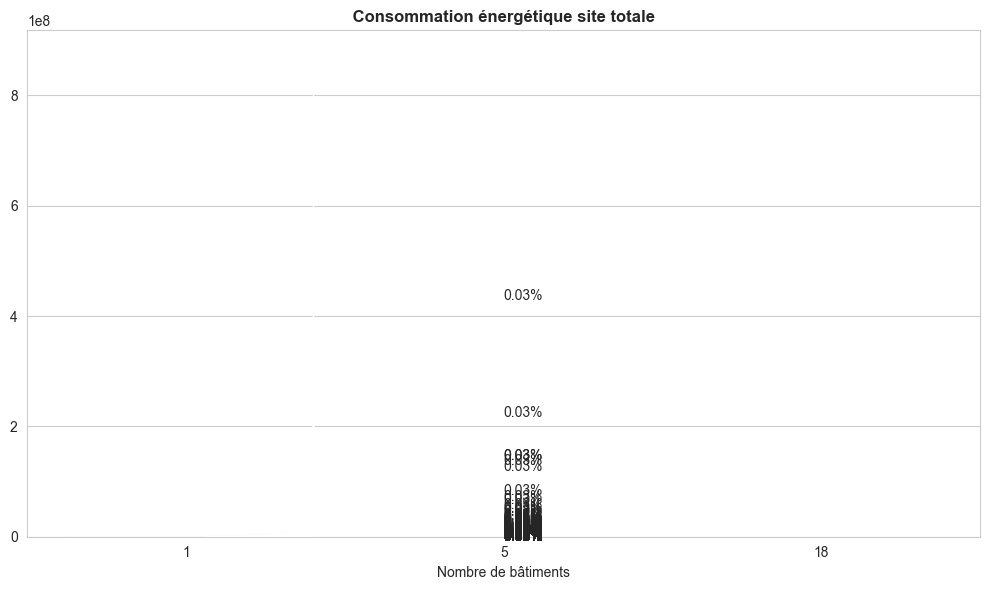

In [6]:
from categorical_analysis import analyse_feature_categorielle

# Analyse de la colonne BuildingType
stats_bt, fig_bt = analyse_feature_categorielle(
    building_consumption, 
    column_name='SiteEnergyUse(kBtu)',
    title=" Consommation énergétique site totale "
)

print("\n📊 TABLEAU RÉCAPITULATIF :")
# print(stats_bt.to_markdown(index=False))

plt.show()

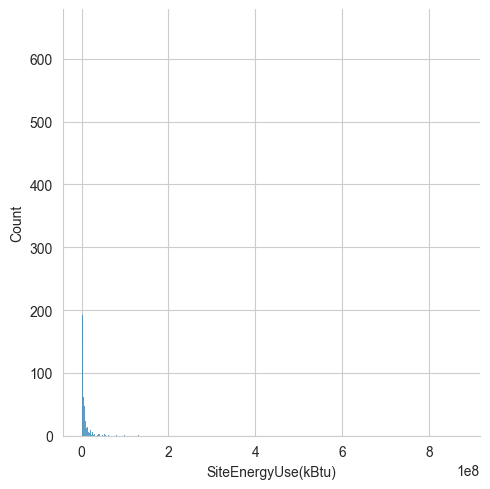

In [7]:
sns.displot(building_consumption['SiteEnergyUse(kBtu)']);


####  TotalGHGEmissions 

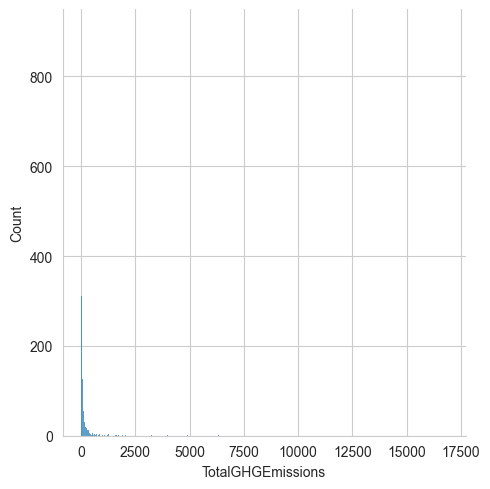

In [8]:
sns.displot(building_consumption['TotalGHGEmissions']);

#### 1.2.3 BuildingType


📊 TABLEAU RÉCAPITULATIF :
| BuildingType         |   Count |   Percentage |
|:---------------------|--------:|-------------:|
| NonResidential       |    1460 |        43.25 |
| Multifamily LR (1-4) |    1018 |        30.15 |
| Multifamily MR (5-9) |     580 |        17.18 |
| Multifamily HR (10+) |     110 |         3.26 |
| SPS-District K-12    |      98 |         2.9  |
| Nonresidential COS   |      85 |         2.52 |
| Campus               |      24 |         0.71 |
| Nonresidential WA    |       1 |         0.03 |


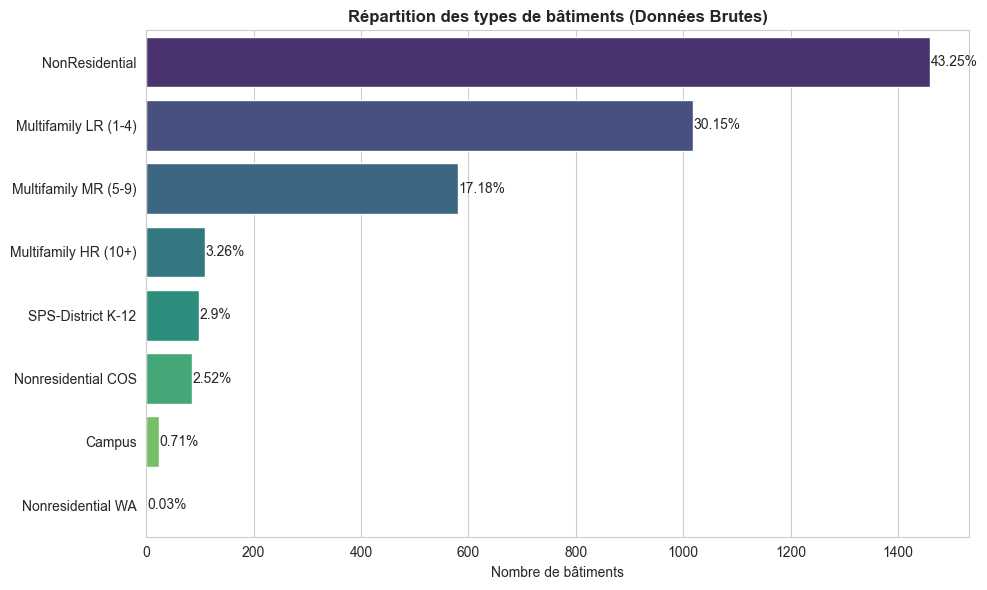

In [9]:
from categorical_analysis import analyse_feature_categorielle

# Analyse de la colonne BuildingType
stats_bt, fig_bt = analyse_feature_categorielle(
    building_consumption, 
    column_name='BuildingType',
    title="Répartition des types de bâtiments (Données Brutes)"
)

print("\n📊 TABLEAU RÉCAPITULATIF :")
print(stats_bt.to_markdown(index=False))

plt.show()

Voici les catégories à CONSERVER :

* NonResidential (43.25%) : Les bureaux, commerces, etc.
* SPS-District K-12 (2.90%) : Les écoles (Seattle Public Schools).
* Nonresidential COS (2.52%) : Les bâtiments de la Ville de Seattle (City Of Seattle).
* Campus (0.71%) : Les grands complexes universitaires ou hospitaliers.
* Nonresidential WA (0.03%) : Les bâtiments de l'État de Washington.

Voici les catégories à EXCLURE (Destinés à l'habitation) :
* Multifamily LR, MR et HR : Ce sont des logements collectifs (immeubles d'appartements de petite, moyenne et grande hauteur). Ils représentent environ 50.59% de votre dataset actuel. Les supprimer est une étape majeure du nettoyage.

In [10]:
from cleaning_filters import filtrer_categories

# 1. Définition des catégories à supprimer (Habitation)
habitation_list = [
    'Multifamily LR (1-4)', 
    'Multifamily MR (5-9)', 
    'Multifamily HR (10+)'
]

# 2. Exécution du filtrage paramétré
building_consumption = filtrer_categories(
    df=building_consumption, 
    column='BuildingType', 
    categories_to_remove=habitation_list
)


————————————————————————————————————————————————————————————
🛠️ NETTOYAGE : Colonne [BuildingType]
————————————————————————————————————————————————————————————
 Valeurs supprimées : ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']
 Lignes supprimées  : 1708
 Lignes restantes   : 1668
 Réduction          : -50.59%
————————————————————————————————————————————————————————————


### 1.3 Clasification des features prédictives

#### 1. Label Encoding : L'Indexation des Profils

* Pour qu'un modèle puisse comparer des bâtiments, il a besoin de les classer. On ne peut pas faire de calculs sur le mot "Hôtel". Le **Label Encoding** transforme chaque catégorie en un index numérique unique. Contrairement à une simple étiquette, cela permet à l'algorithme de créer des groupes (ex: "si l'index est 5, alors c'est un usage industriel"). C'est une manière de transformer une caractéristique qualitative en une coordonnée que la machine peut situer sur une carte.

#### 2. Détection du Leakage : Le Nettoyage des Variables "Miroirs"

* Le **Data Leakage** est un piège où une variable contient déjà, sous une autre forme, la réponse que l'on cherche. En immobilier, la consommation d'énergie et les émissions de gaz à effet de serre sont deux faces d'une même pièce : si vous connaissez l'une, vous connaissez l'autre à 99%. En filtrant les corrélations trop élevées (> 0.90), on s'assure que le modèle apprend à **prédire** à partir de caractéristiques réelles (taille, âge, usage) et non à simplement **traduire** une variable qui ne sera pas disponible au moment de l'utilisation réelle du modèle.

#### 3. Random Forest Global : La Hiérarchie de l'Information

Estimez l’importance de chaque variable: **importances = clf.feature_importances_**

* Au lieu de supposer qu'une variable est importante, on laisse une "forêt" de modèles tester des milliers de combinaisons. Le **Random Forest** va mesurer combien de fois chaque variable a été utilisée pour réduire l'erreur de prédiction. L'avantage du mode "Global", c'est qu'il traite les chiffres (le quantitatif) et les catégories (le qualitatif) sur un pied d'égalité. Cela nous donne un classement objectif : on découvre enfin si c'est la structure physique du bâtiment (sa surface) ou sa fonction sociale (son usage) qui pèse le plus lourd dans sa consommation.



In [11]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude                 

In [12]:
from feature_ranking_engine import ranking_complet_auto

# 1. Calcul du ranking global (Numériques + Catégorielles)
df_ranking_final = ranking_complet_auto(building_consumption, target="SiteEnergyUse(kBtu)", meta_dict=meta_dict)

# 2. Affichage stylisé
print("🏆 CLASSEMENT GLOBAL DES FEATURES (HYBRIDE NUMÉRIQUE & CATÉGORIEL)")
print("-" * 80)

# Utilisation de dégradés de couleurs pour différencier l'importance
# et des icônes pour le type de donnée
def format_type(val):
    return "🔢 Num" if val == "Numérique" else "🏷️ Cat"

# Affichage stylisé mis à jour pour les versions récentes de Pandas
styled_ranking = df_ranking_final.style.format({
    'Importance': '{:.2%}', 
}).map( # <-- On utilise .map() au lieu de .applymap()
    lambda x: 'background-color: #d1e7dd' if 'GRUPO A' in str(x) else '', 
    subset=['Grupo']
).background_gradient(cmap='YlGnBu', subset=['Importance'])

display(styled_ranking)

# 3. Petit résumé automatique 
top_feat = df_ranking_final.iloc[0]
print(f"\n💡 ANALYSE : La variable la plus prédictive est '{top_feat['Feature']}' ({top_feat['Type']})")
print(f"Elle explique à elle seule {top_feat['Importance']:.1%} de la variance selon le modèle Random Forest.")

🏆 CLASSEMENT GLOBAL DES FEATURES (HYBRIDE NUMÉRIQUE & CATÉGORIEL)
--------------------------------------------------------------------------------



💡 ANALYSE : La variable la plus prédictive est 'SiteEnergyUseWN(kBtu)' (Numérique)
Elle explique à elle seule 38.9% de la variance selon le modèle Random Forest.


## 2. Analyse de la Qualité des Données

In [13]:
# Presenter les featules comme lignes avec un mape de chaleur
stats_desc = building_consumption.describe().T
stats_desc.style.background_gradient(cmap='Blues') 

### 2.1. Cartographie des Valeurs Manquantes

 TEST 1: missing_summary                                                       
 Génère un résumé statistique des valeurs manquantes par colonne.              

                             Column  Missing_Count  Missing_Pct    Dtype
0                          Comments           1668   100.000000  float64
1                           Outlier           1651    98.980815   object
2          YearsENERGYSTARCertified           1570    94.124700   object
3       ThirdLargestPropertyUseType           1315    78.836930   object
4    ThirdLargestPropertyUseTypeGFA           1315    78.836930  float64
5      SecondLargestPropertyUseType            813    48.741007   object
6   SecondLargestPropertyUseTypeGFA            813    48.741007  float64
7                   ENERGYSTARScore            574    34.412470  float64
8                           ZipCode             16     0.959233  float64
9         LargestPropertyUseTypeGFA              6     0.359712  float64
10           LargestPropertyUseType 

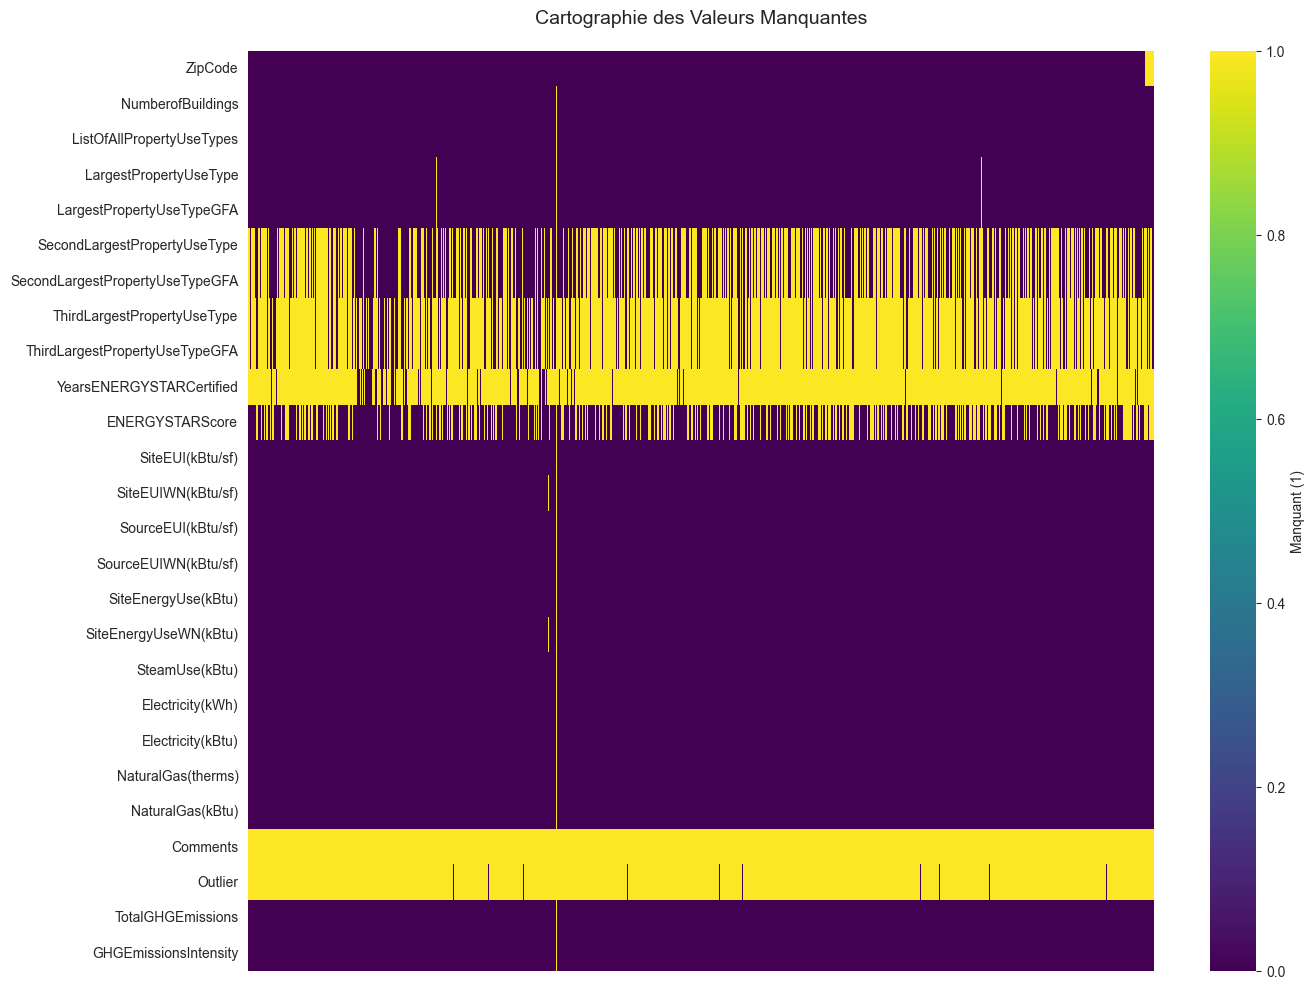

 TEST 3: missing_by_type                                                       
 Crée une cartographie visuelle des patterns de valeurs manquantes.            

Numériques:
                              Column  Missing_Count  Missing_Pct
0                          Comments           1668   100.000000
1    ThirdLargestPropertyUseTypeGFA           1315    78.836930
2   SecondLargestPropertyUseTypeGFA            813    48.741007
3                   ENERGYSTARScore            574    34.412470
4                           ZipCode             16     0.959233
5         LargestPropertyUseTypeGFA              6     0.359712
6             SiteEnergyUseWN(kBtu)              3     0.179856
7                  SiteEUI(kBtu/sf)              3     0.179856
8                SiteEUIWN(kBtu/sf)              3     0.179856
9                 NumberofBuildings              2     0.119904
10             SourceEUIWN(kBtu/sf)              2     0.119904
11               SourceEUI(kBtu/sf)              2     0.1

In [14]:
from missing_analysis import (  missing_summary,  missing_heatmap,   missing_by_type,   missing_threshold_filter )

print("===============================================================================")
print(" TEST 1: missing_summary                                                       ")
print(" Génère un résumé statistique des valeurs manquantes par colonne.              ")
print("===============================================================================\n")
df_miss = missing_summary(building_consumption)
print(df_miss)

print("===============================================================================")
print(" TEST 2: missing_heatmap                                                       ")
print(" Crée une cartographie visuelle des patterns de valeurs manquantes.            ")
print("===============================================================================\n")
fig = missing_heatmap(building_consumption)
plt.show()

print("===============================================================================")
print(" TEST 3: missing_by_type                                                       ")
print(" Crée une cartographie visuelle des patterns de valeurs manquantes.            ")
print("===============================================================================\n")
num_miss, cat_miss = missing_by_type(building_consumption)
print("Numériques:\n", num_miss)
print("Catégorielles:\n", cat_miss)

print("===============================================================================")
print(" TEST 4: missing_threshold_filter                                              ")
print(" Crée une cartographie visuelle des patterns de valeurs manquantes.            ")
print("===============================================================================\n")
print(missing_threshold_filter(building_consumption, threshold=0.3, return_type='dataframe'))

### 2.2. Identification des Colonnes Constantes

 TEST : constant_columns_analysis                                              
 Identifie les colonnes sans information (constantes ou quasi-constantes).     

 Colonnes constantes....: ['DataYear', 'City', 'State', 'Comments']
 Colonnes quasi-const...: ['ZipCode', 'Latitude', 'Longitude']

Top 20 du rapport détaillé :
| Column                       |   N_Unique |   Missing_Pct | Dtype   |      Var_Norm |   Dominant_Pct | Is_Constant   | Is_Quasi   |
|:-----------------------------|-----------:|--------------:|:--------|--------------:|---------------:|:--------------|:-----------|
| DataYear                     |          1 |      0        | int64   |   0           |      100       | True          | False      |
| City                         |          1 |      0        | object  | nan           |      100       | True          | False      |
| State                        |          1 |      0        | object  | nan           |      100       | True          | False      |
| Commen

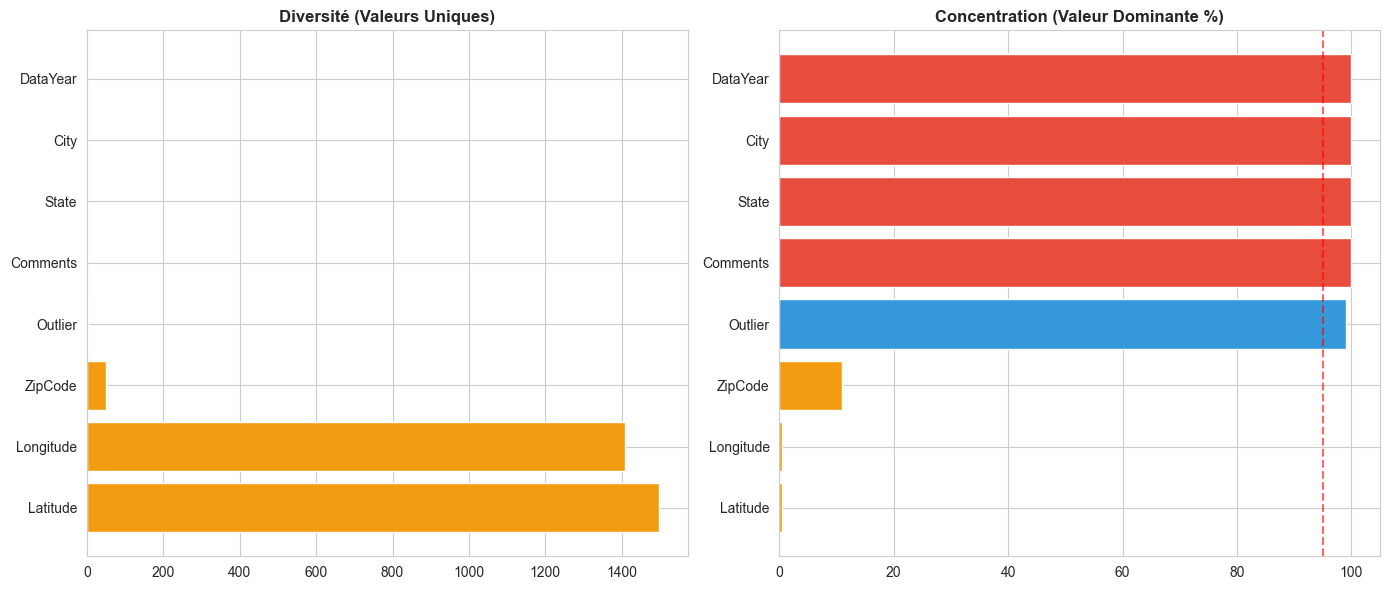

In [15]:
from variance_analysis import constant_columns_analysis, plot_constant_analysis

print("===============================================================================")
print(" TEST : constant_columns_analysis                                              ")
print(" Identifie les colonnes sans information (constantes ou quasi-constantes).     ")
print("===============================================================================\n")

# Ejecución del análisis
res_var = constant_columns_analysis(building_consumption)

# Mostrar resumen
print(f" Colonnes constantes....: {res_var['constant_cols']}")
print(f" Colonnes quasi-const...: {res_var['quasi_constant_cols']}")
print("\nTop 20 du rapport détaillé :")
print(res_var['summary_df'].head(20).to_markdown(index=False))

print("\n===============================================================================")
print(" VISUALISATION : plot_constant_analysis                                        ")
print("===============================================================================\n")
fig_var = plot_constant_analysis(res_var['summary_df'])
if fig_var:
    plt.show()

### 2.4. Synthèse des Candidats à Suppression

In [16]:
from feature_selection_report import generer_synthese_suppression

# Appel de la synthèse (Seuil 95% par défaut)
cols_a_supprimer, df_rapport = generer_synthese_suppression(
    building_consumption, 
    df_miss, 
    res_var
)

# Affichage du rapport final
print(df_rapport.to_markdown(index=False))


ÉTAPE 2.4 : SYNTHÈSE DES CANDIDATS À LA SUPPRESSION
 Nombre total de colonnes analysées..: 46
 Colonnes identifiées pour retrait...: 5
--------------------------------------------------------------------------------
| Column   | Raison_Principale                    | Dtype   | Impact_Potentiel          |
|:---------|:-------------------------------------|:--------|:--------------------------|
| City     | Constante (Unique)                   | object  | Perte d'information nulle |
| Comments | Manquants > 95% & Constante (Unique) | float64 | Perte d'information nulle |
| DataYear | Constante (Unique)                   | int64   | Perte d'information nulle |
| Outlier  | Manquants > 95%                      | object  | Perte d'information nulle |
| State    | Constante (Unique)                   | object  | Perte d'information nulle |


## 3. Analyse Univariée - Variables Numériques
### 3.1. Statistiques Descriptives

In [17]:
%load_ext autoreload
%autoreload 2
from univariate_analysis import analyser_statistiques_globales

# Ejecución de la síntesis estadística
stats_desc, cols_scal, cols_log = analyser_statistiques_globales(building_consumption)

# Mostrar el resumen estadístico con las nuevas columnas calculadas
print("\n📋 RÉSUMÉ STATISTIQUE ÉTENDU :")
print(stats_desc.columns.tolist())
print(stats_desc[['mean', 'std', 'min', 'max', 'Skewness', 'CV', 'Action_Recommandee']].head(20).to_markdown())


ÉTAPE 3.1 : ANALYSE STATISTIQUE ET DIAGNOSTIC DES ÉCHELLES
 Variables numériques analysées.......: 30
 Variables à échelles critiques.......: 14
 Variables fortement asymétriques.....: 22

⚠️ ALERTE ÉCHELLES :
   - DataYear                       : Moyenne = 2.02e+03
   - CouncilDistrictCode            : Moyenne = 4.36e+00
   - Latitude                       : Moyenne = 4.76e+01
   - Longitude                      : Moyenne = -1.22e+02
   - YearBuilt                      : Moyenne = 1.96e+03

📊 ALERTE ASYMÉTRIE :
   - ZipCode                        : Skewness = 1.31
   - NumberofBuildings              : Skewness = 32.48
   - NumberofFloors                 : Skewness = 6.04
   - PropertyGFATotal               : Skewness = 19.16
   - PropertyGFAParking             : Skewness = 5.22
--------------------------------------------------------------------------------

📋 RÉSUMÉ STATISTIQUE ÉTENDU :
['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Range', 'Skewness', 'CV', 'Action_Re

### 3.2. Distributions Clés

📊 Analyse visuelle des variables asymétriques (Candidats au Log)


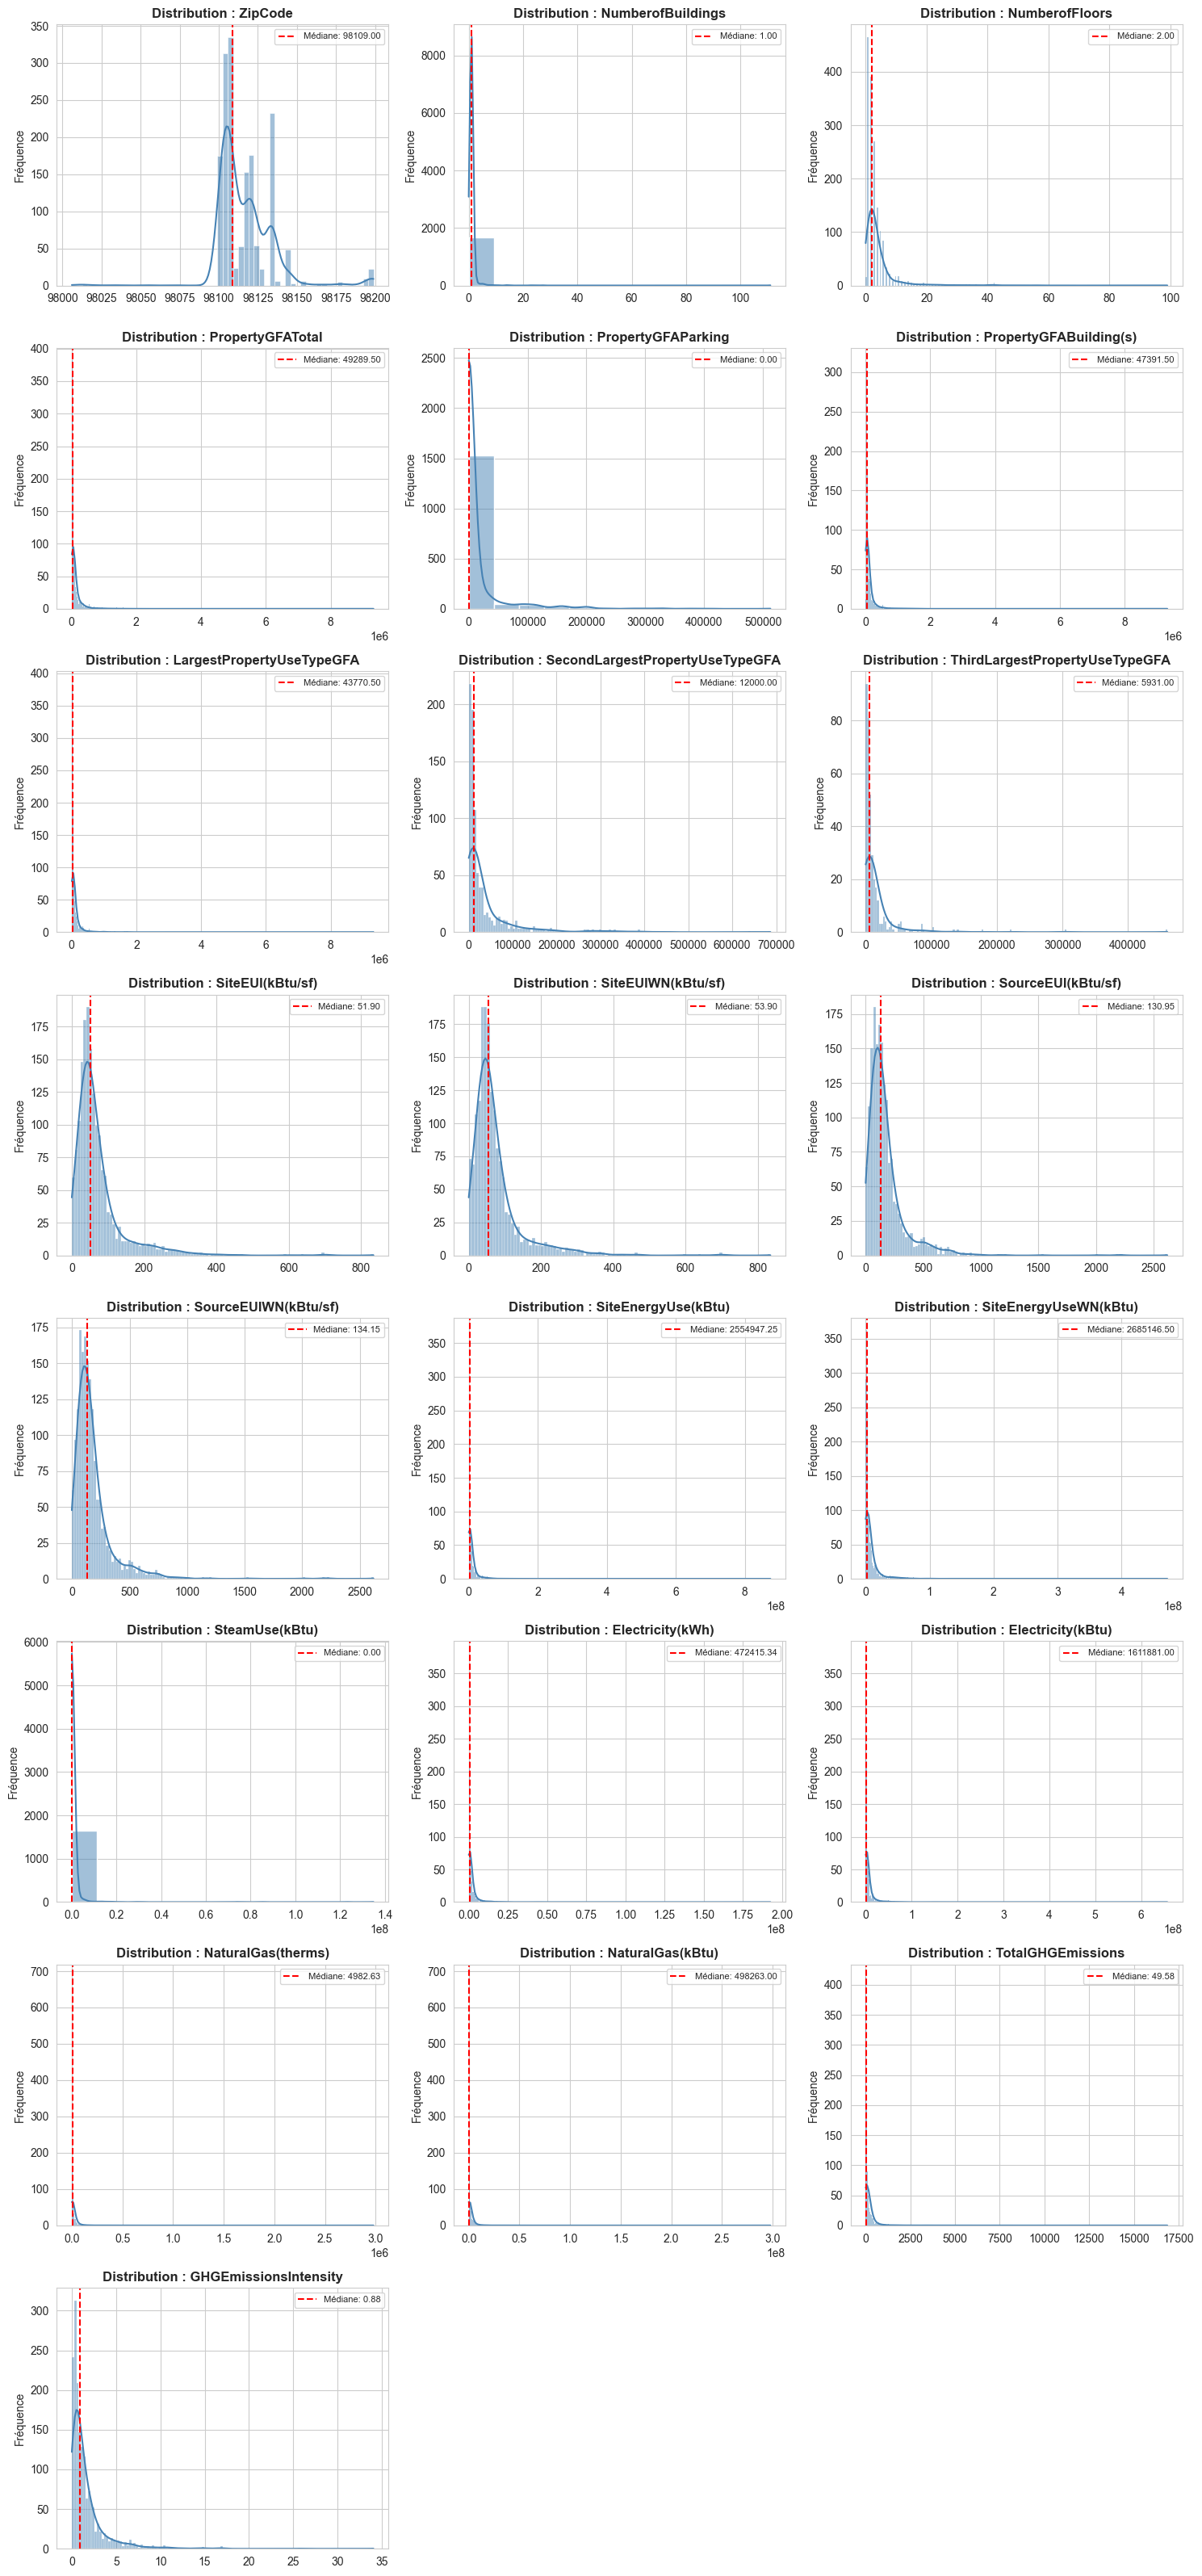

In [18]:
from univariate_visualization import plot_distributions_grille

# 1. Visualisons uniquement les variables asymétriques (celles identifiées avant)
print("📊 Analyse visuelle des variables asymétriques (Candidats au Log)")
fig_dist = plot_distributions_grille(building_consumption, columns=cols_log)

if fig_dist:
    plt.show()

### 3.5. Interprétation

In [19]:
from interpretation_expert import interpreter_proprietes_vars

# Generar el diagnóstico experto
df_expert = interpreter_proprietes_vars(building_consumption)

# Mostrar el resultado profesional
print(df_expert.to_markdown(index=False))


ÉTAPE 3.5 : INTERPRÉTATION AUTOMATIQUE DU DATASET
| Variable                        | Asymétrie                 | Type_Queues                         | Outliers_IQR     | Action_Data          |
|:--------------------------------|:--------------------------|:------------------------------------|:-----------------|:---------------------|
| OSEBuildingID                   | Symétrique (Normale)      | Queues normales                     | Aucun            | Standardize          |
| DataYear                        | Symétrique (Normale)      | Queues normales                     | Aucun            | Standardize          |
| ZipCode                         | Asymétrie Positive (1.3)  | Queues lourdes (Outliers probables) | Modérée (3.1%)   | Standardize          |
| CouncilDistrictCode             | Symétrique (Normale)      | Distribution plate (Uniforme)       | Aucun            | Standardize          |
| Latitude                        | Symétrique (Normale)      | Queues normales      

## 6. Détection et Caractérisation des Outliers

### 6.3. Colonne "Outlier" Existante

In [20]:
from outlier_engine import detecter_anomalies_global

# Définition des colonnes à analyser
colonnes_numeriques   = building_consumption.select_dtypes(include=["number"]).columns.tolist()
colonnes_categoriques = building_consumption.select_dtypes(include=["object", "category"]).columns.tolist()

# Exécution du scanneur global
rapport_num, rapport_cat = detecter_anomalies_global(building_consumption, colonnes_numeriques, colonnes_categoriques)

nb_num_rares = len(rapport_num)

# --- AFFICHAGE DU RAPPORT NUMÉRIQUE ---
print(f"🚩 ANALYSE DES OUTLIERS STATISTIQUES (IQR) : {nb_num_rares}")
for col, info in rapport_num.items():
    print(f" - {col:.<35}: {info['nb_outliers']} bâtiments hors bornes {info['bornes']}")

# --- AFFICHAGE DU RAPPORT QUALITATIF ---
nb_cat_rares = len(rapport_cat)

print(f"\n🚩 ANOMALIES DE CATÉGORIES (FRÉQUENCES FAIBLES) : {nb_cat_rares}")

for col, info in rapport_cat.items():
    valeurs    = info['valeurs_rares']
    frequences = info['frequences']
    
    # Création du dictionnaire complet
    details_complet = dict(zip(valeurs, frequences))
    
    # Calcul de la longueur
    nb_categories_rares = len(valeurs)
    
    # Sélection des 10 premiers éléments pour l'affichage
    # On utilise le slicing [0:10] pour ne pas saturer le notebook
    top_10_details = dict(list(details_complet.items())[:10])
    
    suffixe = "..." if nb_categories_rares > 10 else ""
    
    print(f" - {col:.<35}: {nb_categories_rares} catégories trouvées")
    print(f"   Aperçu (top 10) : {top_10_details}{suffixe}")
    print("-" * 80)

🚩 ANALYSE DES OUTLIERS STATISTIQUES (IQR) : 23
 - ZipCode............................: 51 bâtiments hors bornes (98075.0, 98155.0)
 - Longitude..........................: 199 bâtiments hors bornes (-122.38, -122.29)
 - NumberofBuildings..................: 105 bâtiments hors bornes (1.0, 1.0)
 - NumberofFloors.....................: 138 bâtiments hors bornes (-3.5, 8.5)
 - PropertyGFATotal...................: 203 bâtiments hors bornes (-84293.12, 219095.88)
 - PropertyGFAParking.................: 333 bâtiments hors bornes (0.0, 0.0)
 - PropertyGFABuilding(s).............: 181 bâtiments hors bornes (-70951.5, 194186.5)
 - LargestPropertyUseTypeGFA..........: 173 bâtiments hors bornes (-74156.88, 191668.12)
 - SecondLargestPropertyUseTypeGFA....: 120 bâtiments hors bornes (-34446.5, 71677.5)
 - ThirdLargestPropertyUseTypeGFA.....: 36 bâtiments hors bornes (-12754.0, 28358.0)
 - SiteEUI(kBtu/sf)...................: 159 bâtiments hors bornes (-38.3, 153.7)
 - SiteEUIWN(kBtu/sf)..............

#### Visualisation pour les batiments (BuildingType)

📊 Analyse combinée pour 23 variables


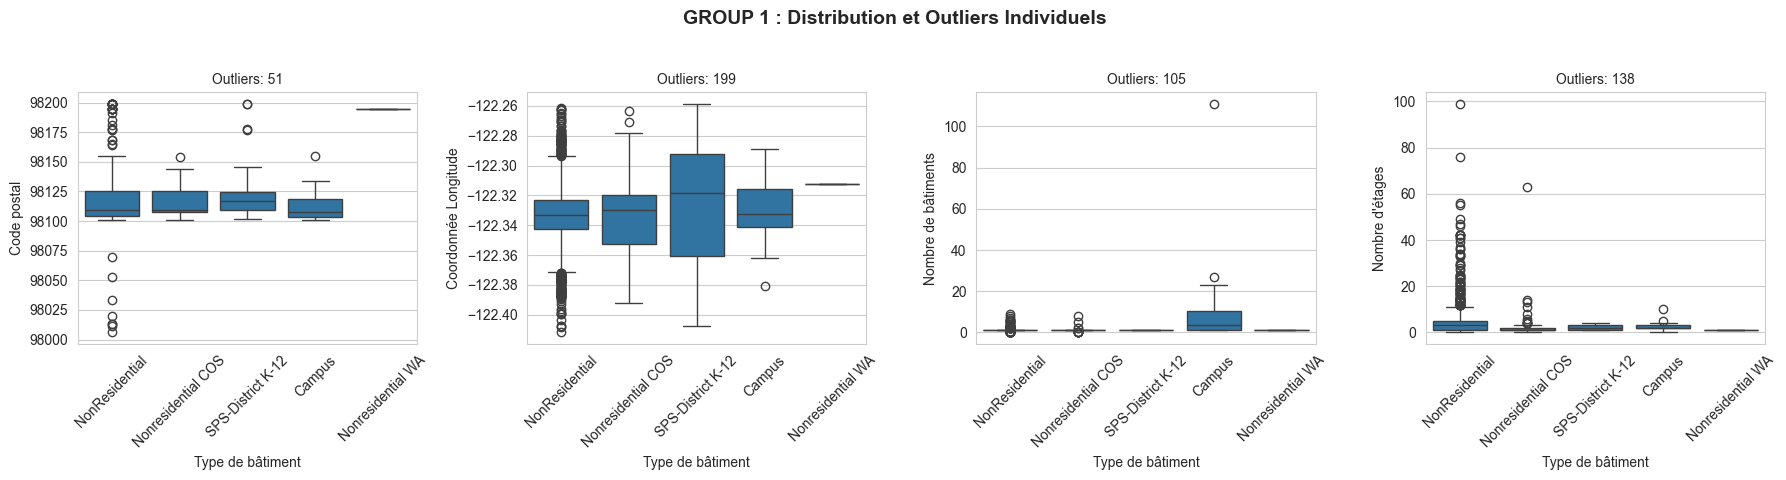

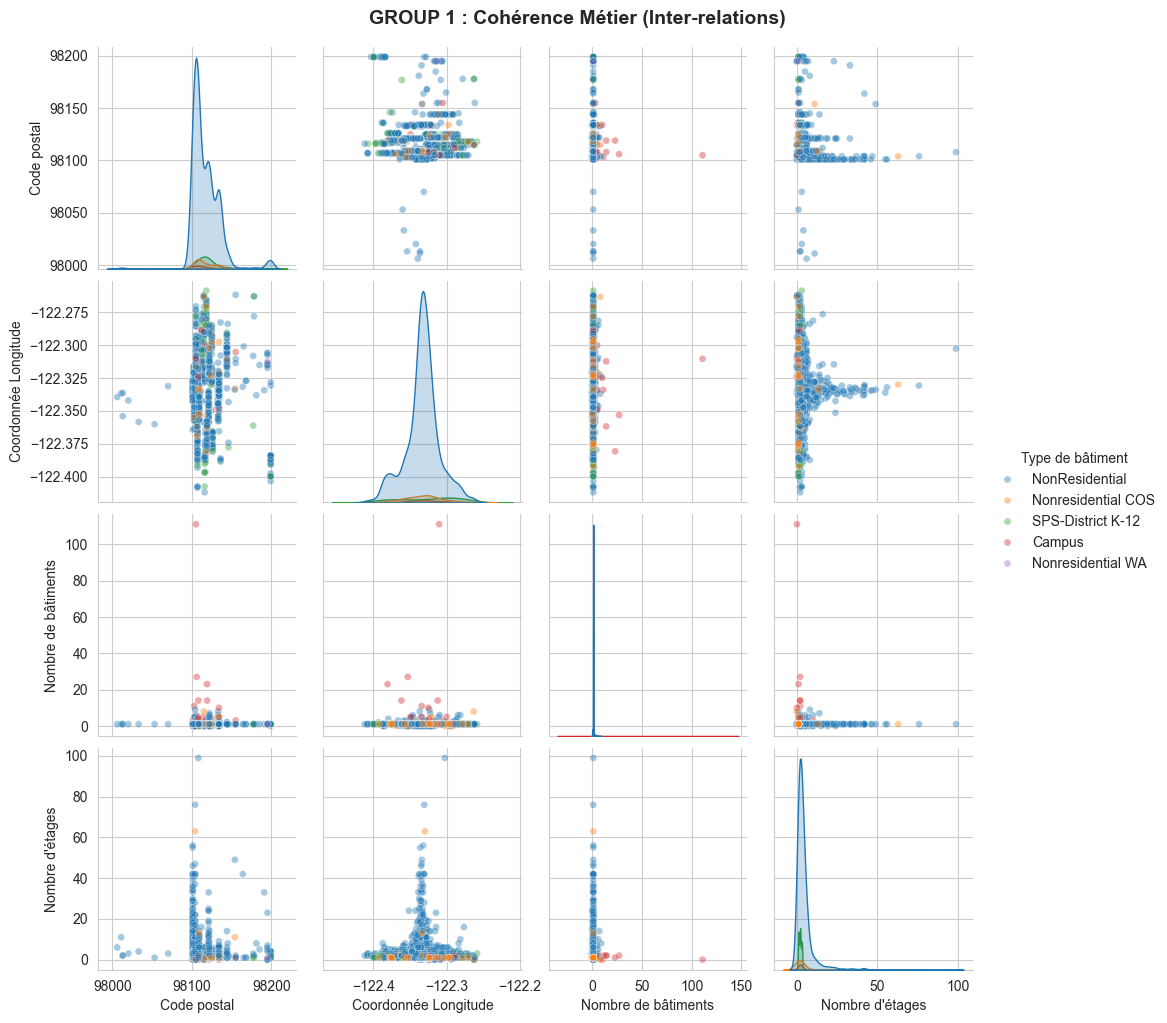

----------------------------------------------------------------------------------------------------


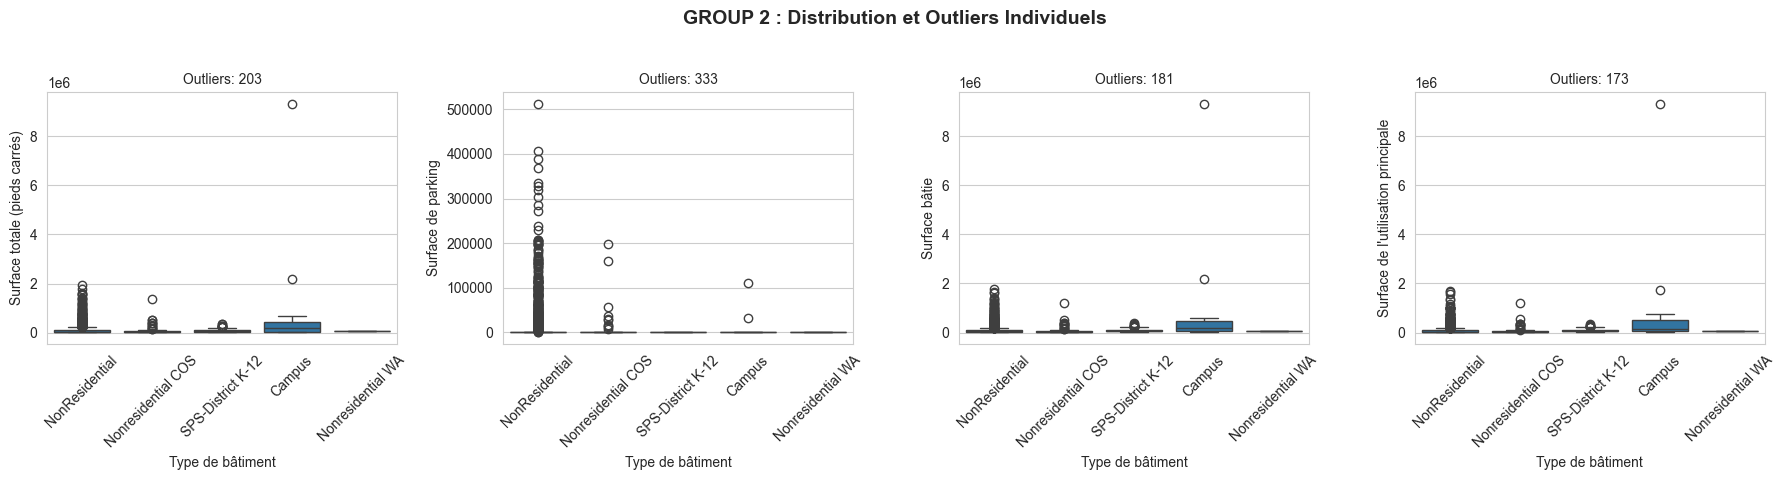

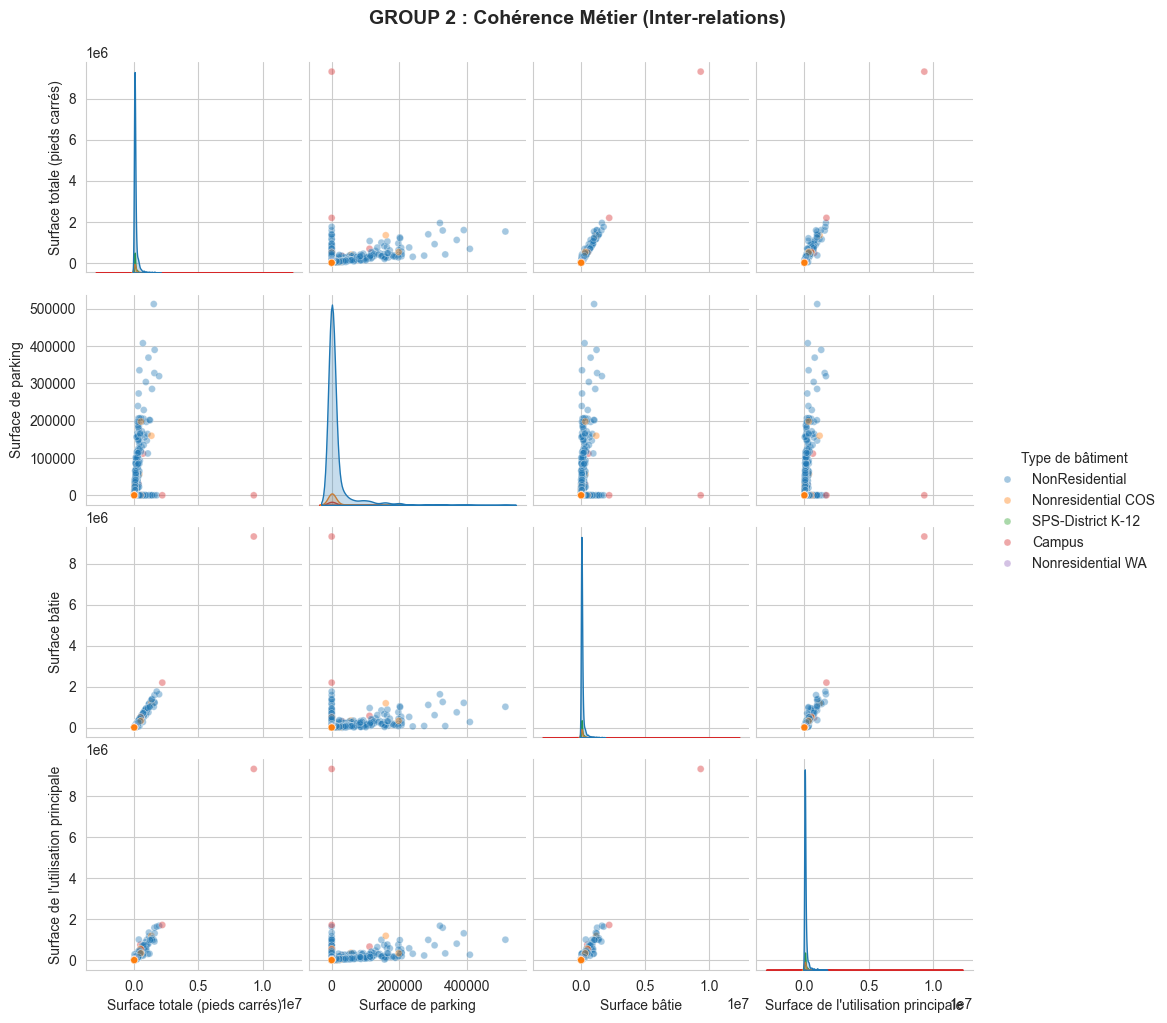

----------------------------------------------------------------------------------------------------


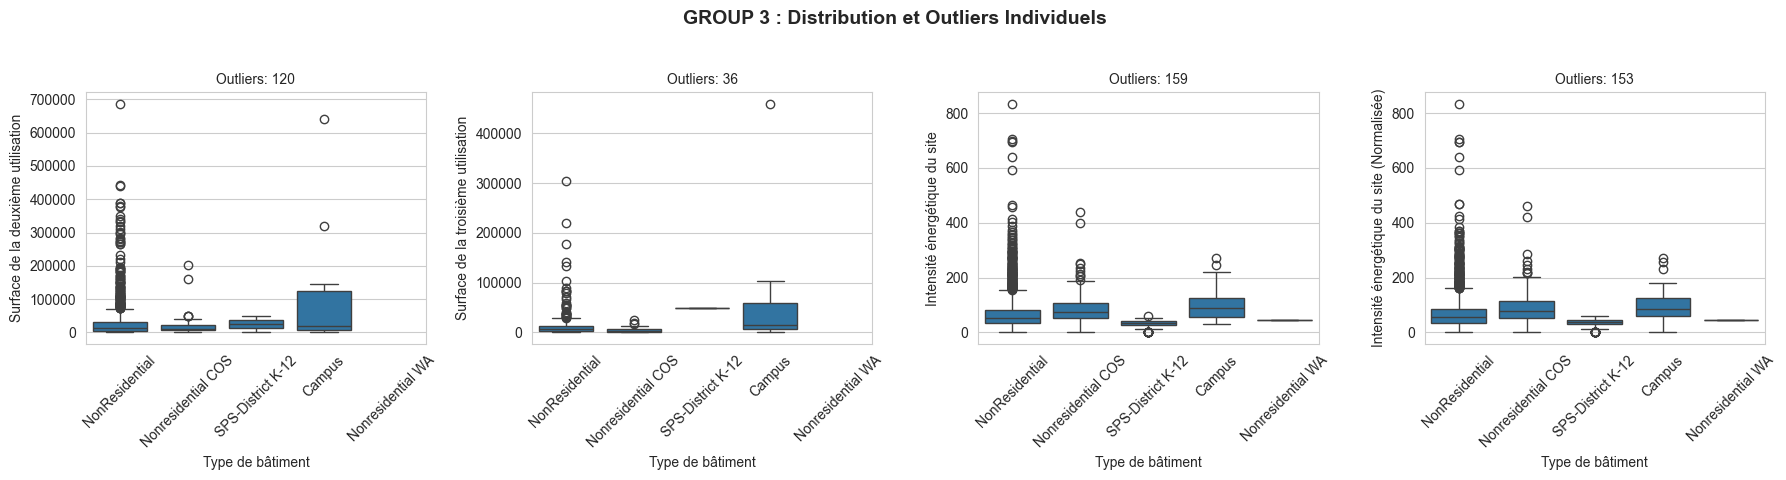

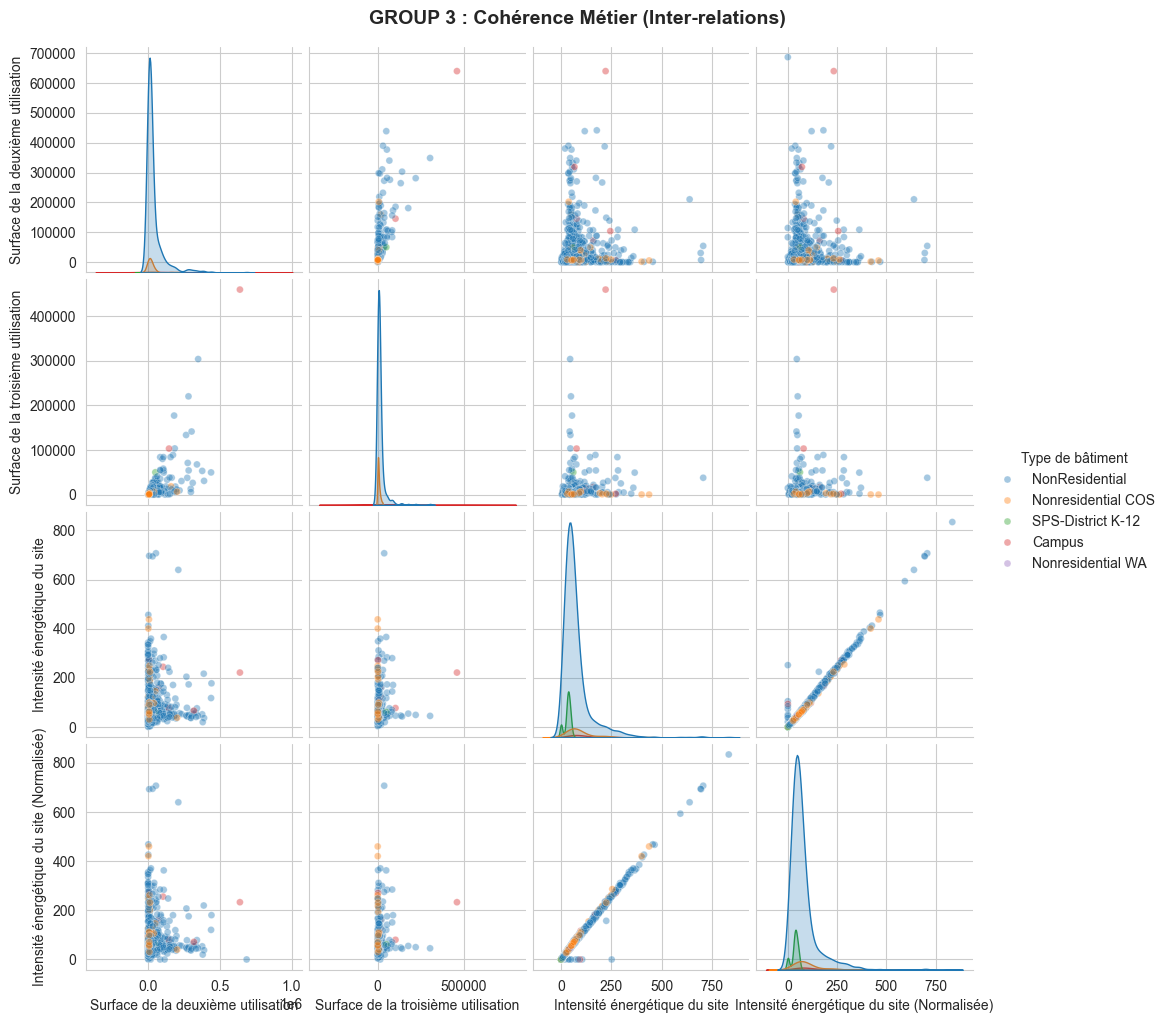

----------------------------------------------------------------------------------------------------


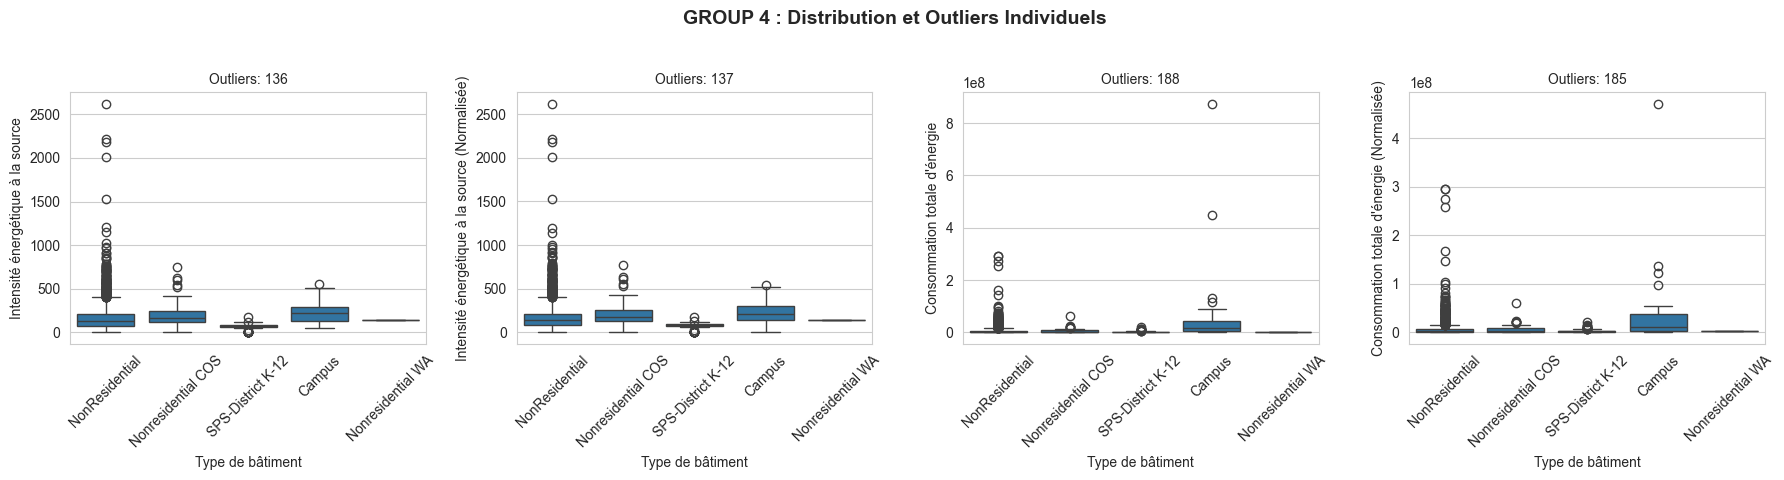

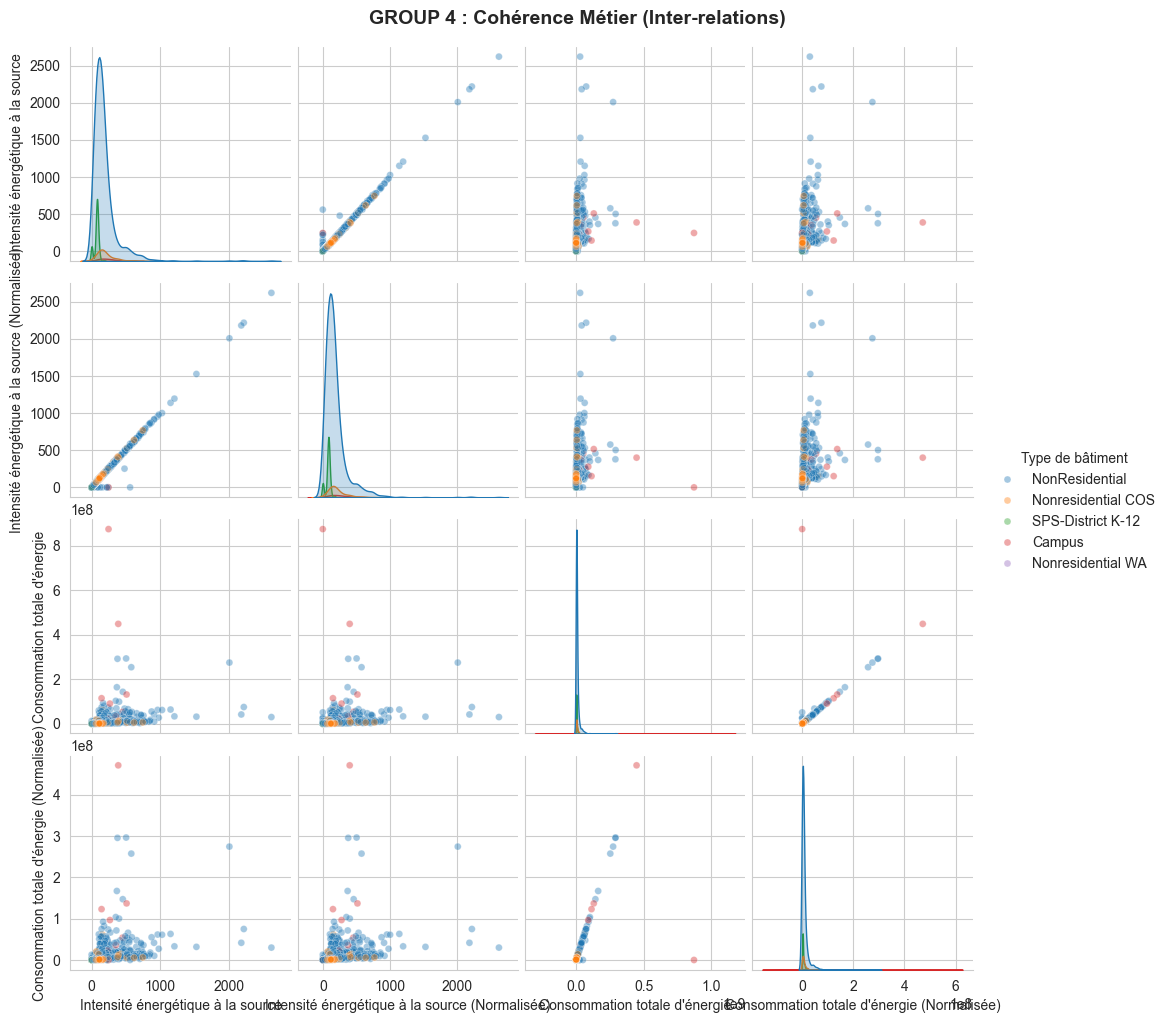

----------------------------------------------------------------------------------------------------


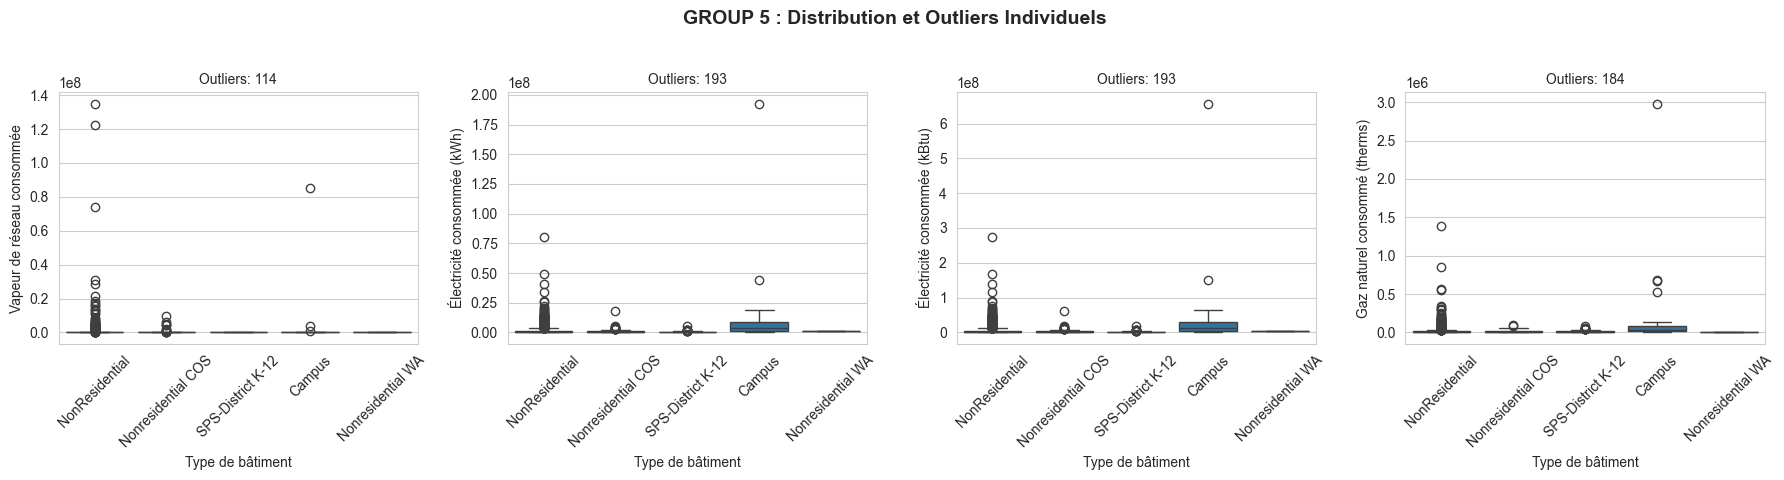

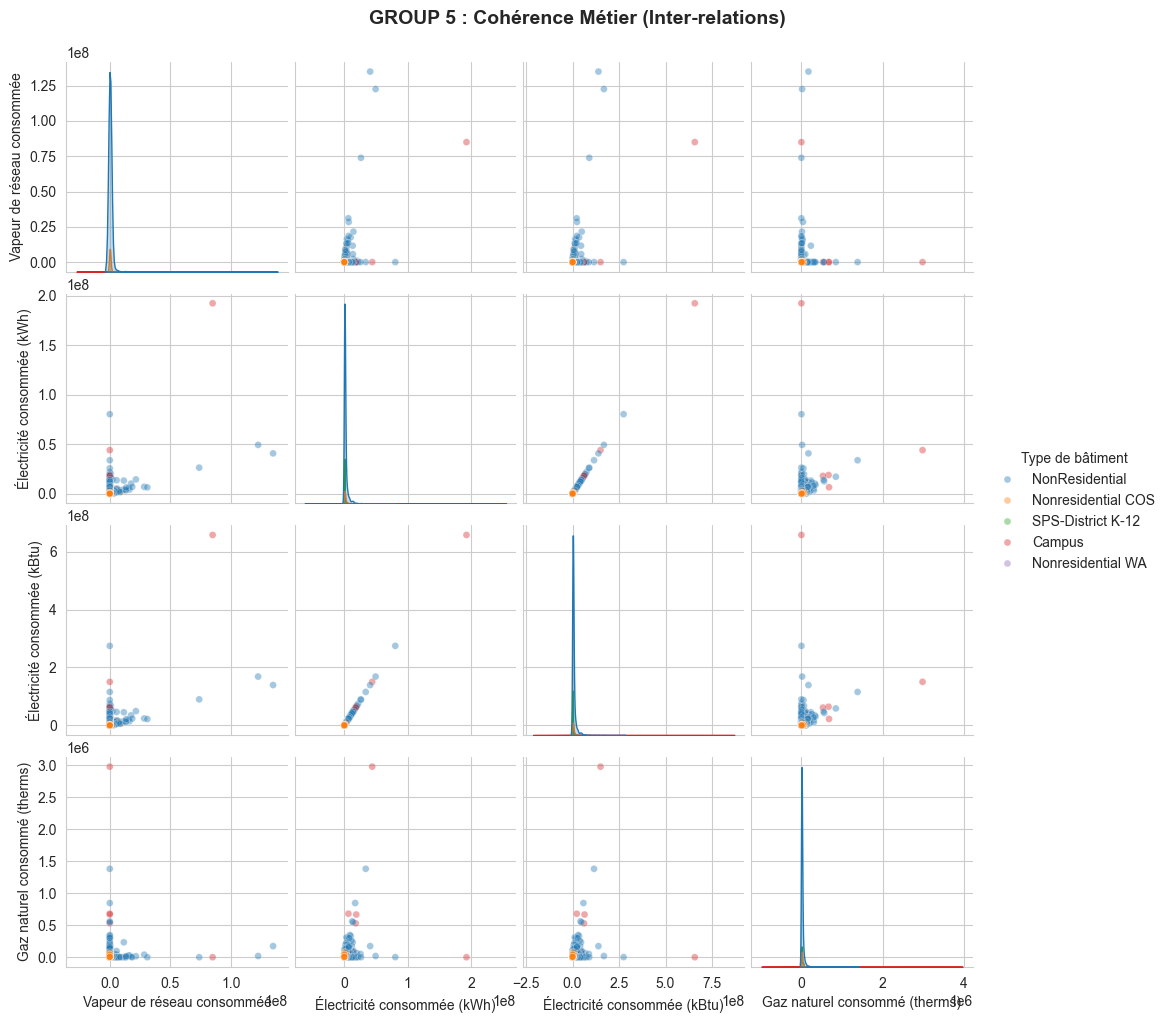

----------------------------------------------------------------------------------------------------


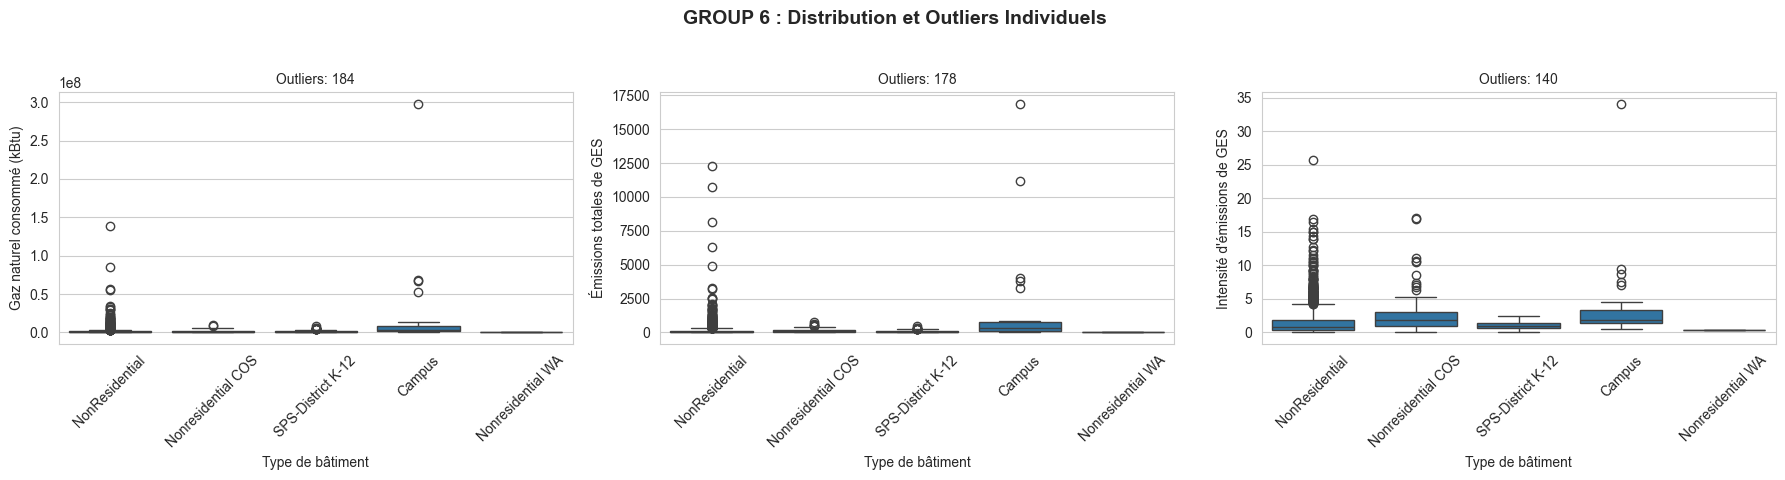

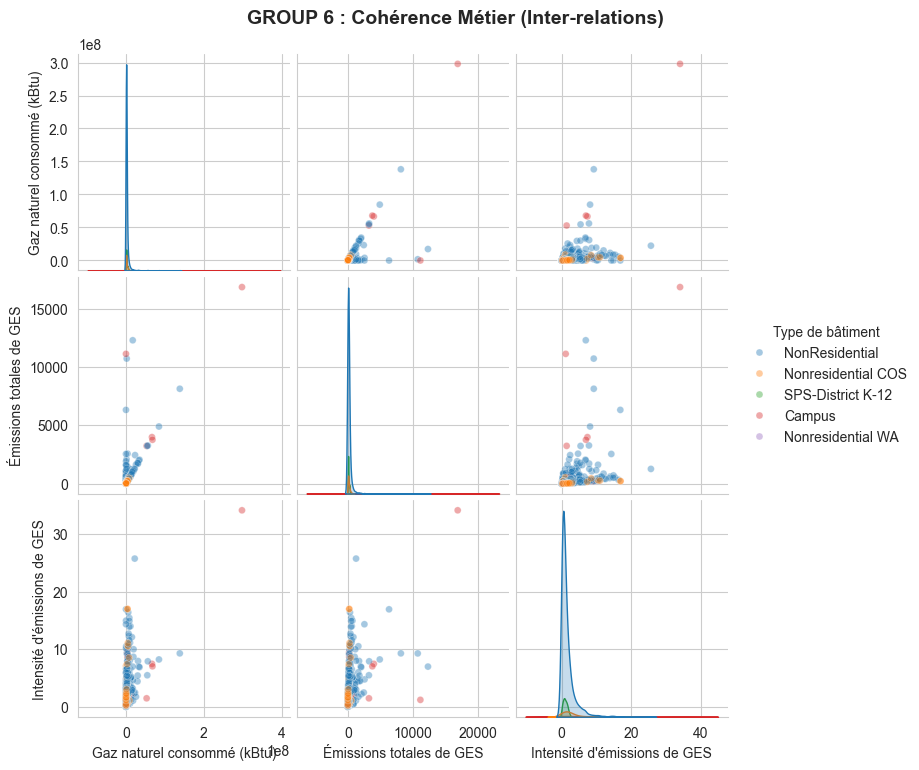

----------------------------------------------------------------------------------------------------


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

# 1. Préparation des colonnes et des groupes
all_outlier_cols = list(rapport_num.keys())
n = 4
groups = [all_outlier_cols[i:i + n] for i in range(0, len(all_outlier_cols), n)]

print(f"📊 Analyse combinée pour {len(all_outlier_cols)} variables")

for i, group in enumerate(groups):
    # --- PRÉPARATION DES DONNÉES ---
    cols_a_extraire = group + ["BuildingType"]
    if isinstance(building_consumption, pl.DataFrame):
        df_temp = building_consumption.select(cols_a_extraire).to_pandas()
    else:
        df_temp = building_consumption[cols_a_extraire].copy()
    
    df_plot = df_temp.rename(columns=meta_dict)
    nom_hue = meta_dict.get("BuildingType", "BuildingType")

    # --- ÉTAPE A : BOXPLOTS (Vision Individuelle) ---
    # On crée une ligne de graphiques pour les boxplots du groupe
    fig, axes = plt.subplots(1, len(group), figsize=(18, 5))
    fig.suptitle(f"GROUP {i+1} : Distribution et Outliers Individuels", fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(group):
        nom_col_traduit = meta_dict.get(col, col)
        sns.boxplot(data=df_plot, y=nom_col_traduit, x=nom_hue, ax=axes[idx])
        axes[idx].set_title(f"Outliers: {rapport_num[col]['nb_outliers']}", fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- ÉTAPE B : PAIRPLOT (Vision Relationnelle / Cohérence) ---
    g = sns.pairplot(
        df_plot,
        hue=nom_hue,
        diag_kind="kde",
        plot_kws={'alpha': 0.4, 's': 25}
    )
    g.fig.suptitle(f"GROUP {i+1} : Cohérence Métier (Inter-relations)", y=1.02, fontsize=14, fontweight='bold')
    plt.show()
    
    print("-" * 100)

## 7. Analyse Multivariée et Corrélations

### 7.1. Matrice de Corrélation (Heatmap des variables numériques pertinentes)

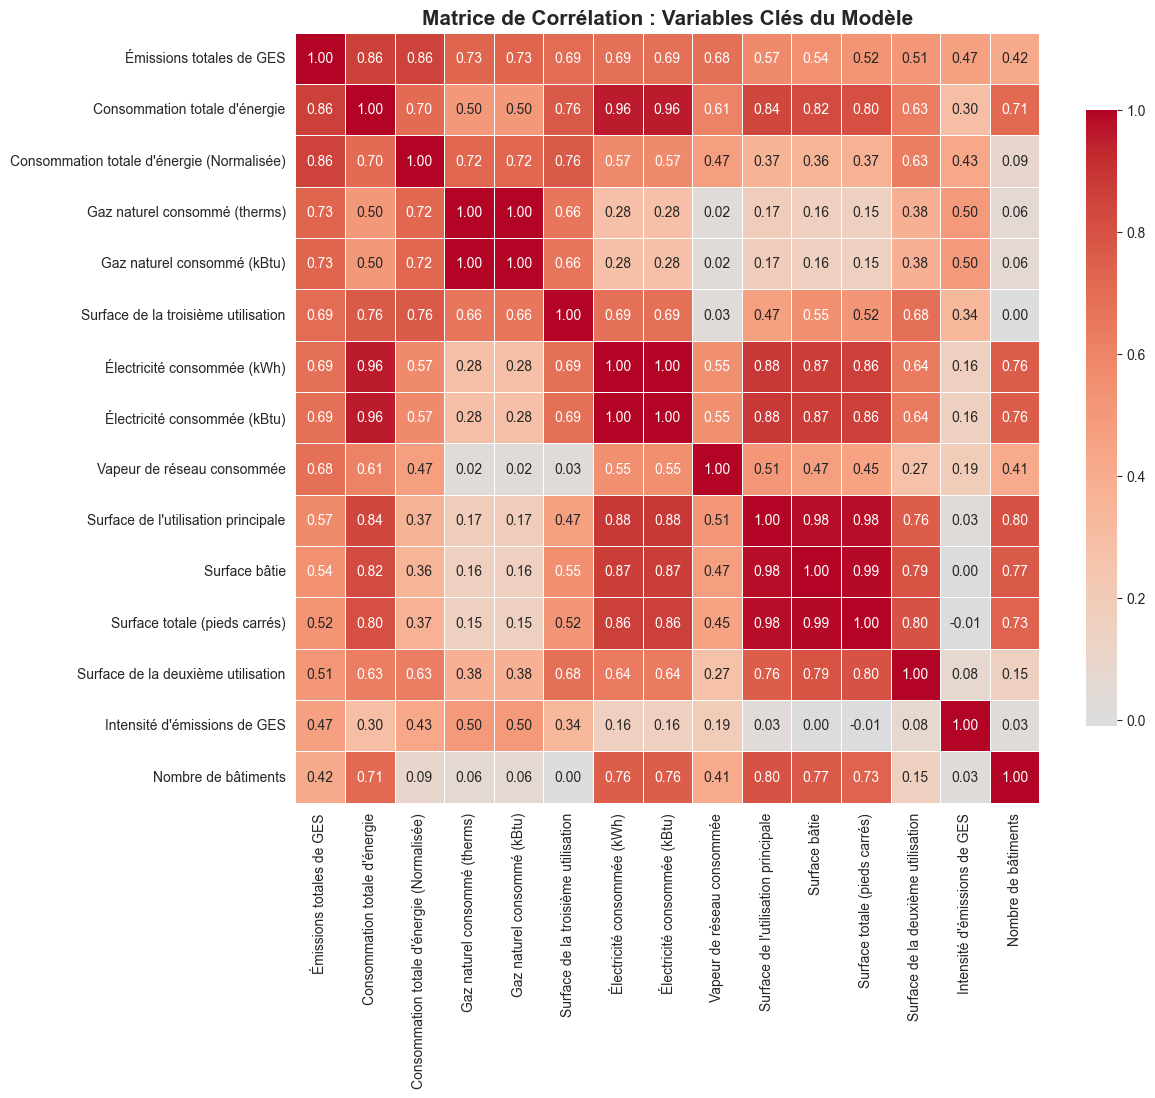

In [22]:
from analysis_correlation_engine import filtrer_features_pertinentes, plot_correlation_heatmap

# 1. Sélection automatique des variables corrélées à plus de 40% (0.4) avec la cible
# Cela nous permet de voir ce qui influence réellement les émissions.
top_features = filtrer_features_pertinentes(building_consumption, target="TotalGHGEmissions", threshold=0.4)

# 2. Affichage de la Heatmap
plot_correlation_heatmap(building_consumption, top_features, meta_dict)

### 7.2. Pairplot des Variables Énergétiques

📊 Génération du Pairplot pour 17 variables...


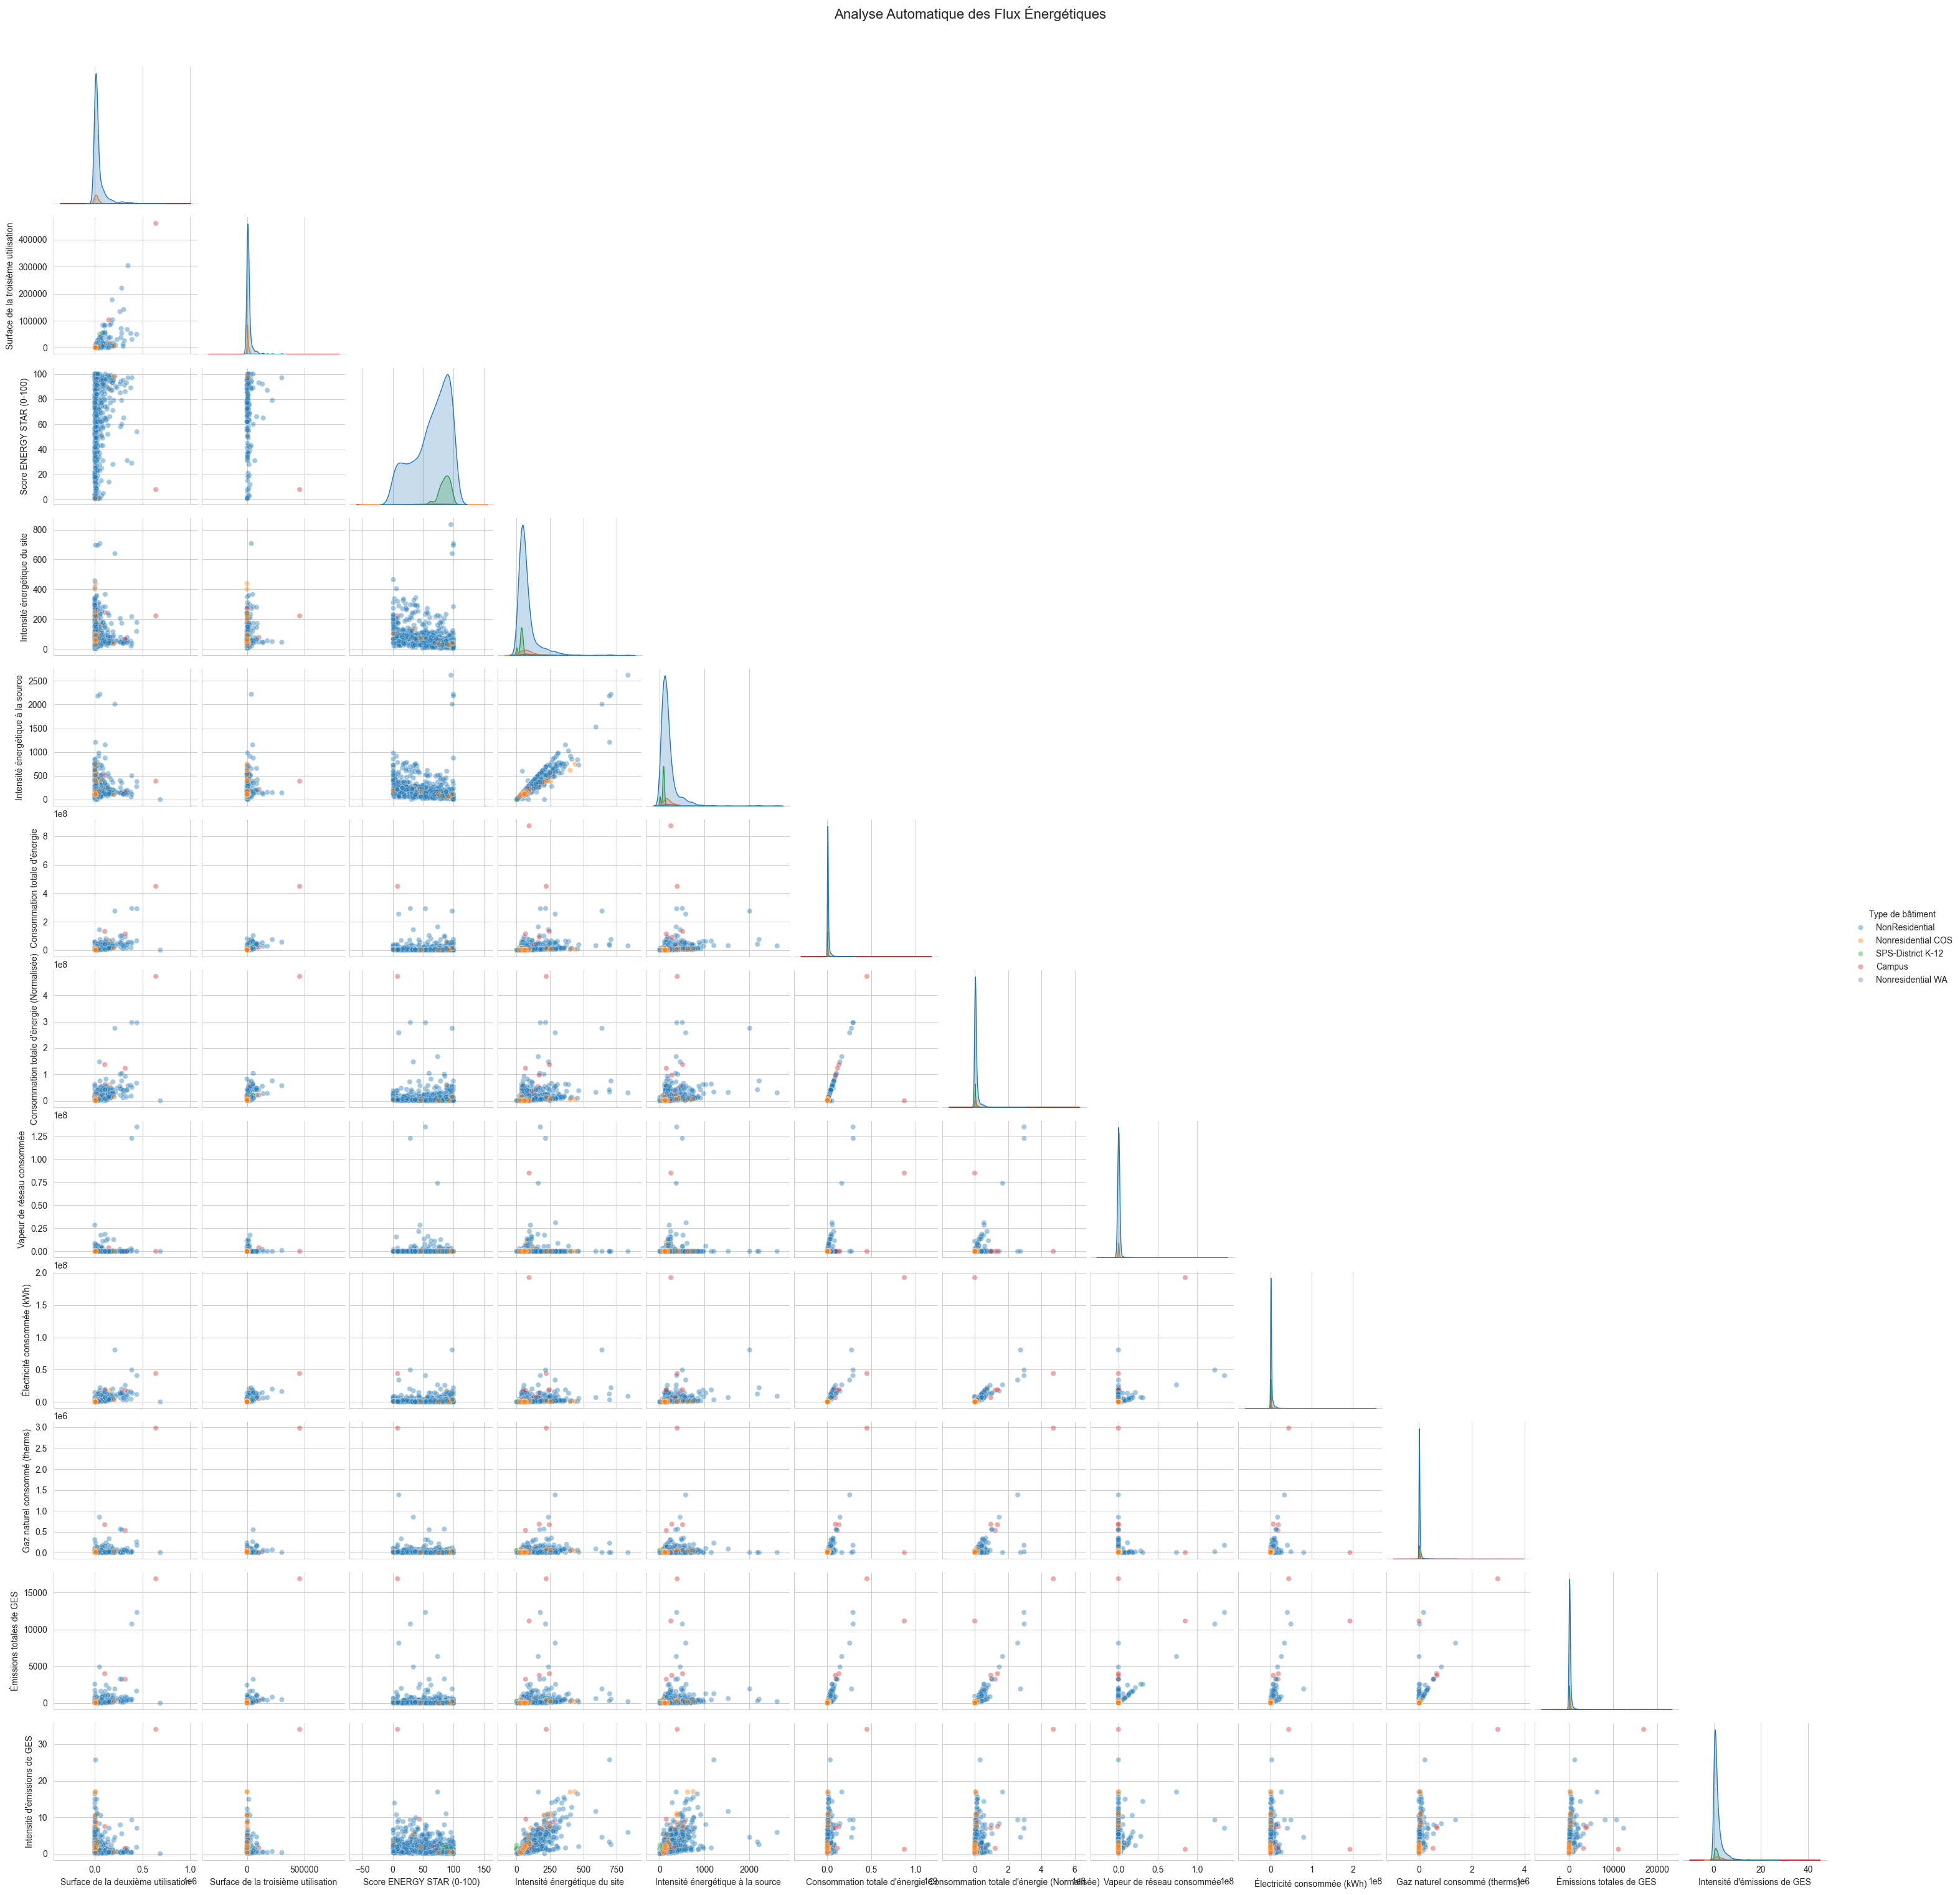

In [23]:
from domain_analysis_engine import identifier_variables_energetiques, filtrer_colinearite_elevee
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Détection et filtrage
vars_energetiques  = identifier_variables_energetiques(building_consumption)
colonnes_trop_corr = filtrer_colinearite_elevee(building_consumption, threshold=0.98)
vars_finales       = [v for v in vars_energetiques if v not in colonnes_trop_corr]

# 2. Préparation du DataFrame pour Seaborn (Gestion hybride Pandas/Polars)
# On ajoute la variable de segmentation (hue)
cols_selection = vars_finales + ["BuildingType"]

if isinstance(building_consumption, pl.DataFrame):
    # Si c'est du Polars, on convertit
    df_pair = building_consumption.select(cols_selection).to_pandas()
else:
    # Si c'est déjà du Pandas, on fait juste une copie des colonnes
    df_pair = building_consumption[cols_selection].copy()

# 3. Renommage et Visualisation
df_pair = df_pair.rename(columns=meta_dict)
nom_hue = meta_dict.get("BuildingType", "BuildingType")

print(f"📊 Génération du Pairplot pour {len(vars_finales)} variables...")

g = sns.pairplot(
    df_pair, 
    hue=nom_hue,
    corner=True,
    diag_kind="kde",
    plot_kws={'alpha': 0.4}
)
g.fig.suptitle("Analyse Automatique des Flux Énergétiques", y=1.02, fontsize=16)
plt.show()

### 7.3. Redondance entre Variables (Identification des corrélations > 0.90)

In [24]:
from domain_analysis_engine import rapport_redondance

# 1. Ejecutar la detección de redundancia con el umbral de 0.90
lista_redondancias = rapport_redondance(building_consumption, threshold=0.90)

print(f"🚩 IDENTIFICACIÓN DE REDUNDANCIAS (Correlación > 0.90):")
print("-" * 60)

if not lista_redondancias:
    print("✅ No se detectaron variables redundantes.")
else:
    for item in lista_redondancias:
        v1   = item['var1'] # Nombre técnico original
        v2   = item['var2'] # Nombre técnico original
        corr = item['correlation']
        
        # Obtenemos el nombre descriptivo del diccionario, o el original si no existe
        n1   = meta_dict.get(v1, v1)
        n2   = meta_dict.get(v2, v2)
        
        # Formato: Nombre Amigable (Nombre_Técnico)
        print(f"⚠️ {n1} ({v1})  <--->  {n2} ({v2})")
        print(f"   Indice de corrélation : {corr:.4f}")
        print("-" * 60)

# 2. Decisión técnica
cols_a_eliminar = list(set([item['var2'] for item in lista_redondancias]))
print(f"\n💡 Sugerencia técnica: Eliminar {len(cols_a_eliminar)} variables para evitar multicolinealidad.")
print(f"Variables sugeridas (nombres técnicos): {cols_a_eliminar}")

🚩 IDENTIFICACIÓN DE REDUNDANCIAS (Correlación > 0.90):
------------------------------------------------------------
⚠️ Surface totale (pieds carrés) (PropertyGFATotal)  <--->  Surface bâtie (PropertyGFABuilding(s))
   Indice de corrélation : 0.9905
------------------------------------------------------------
⚠️ Surface totale (pieds carrés) (PropertyGFATotal)  <--->  Surface de l'utilisation principale (LargestPropertyUseTypeGFA)
   Indice de corrélation : 0.9776
------------------------------------------------------------
⚠️ Surface bâtie (PropertyGFABuilding(s))  <--->  Surface de l'utilisation principale (LargestPropertyUseTypeGFA)
   Indice de corrélation : 0.9822
------------------------------------------------------------
⚠️ Intensité énergétique du site (SiteEUI(kBtu/sf))  <--->  Intensité énergétique du site (Normalisée) (SiteEUIWN(kBtu/sf))
   Indice de corrélation : 0.9931
------------------------------------------------------------
⚠️ Intensité énergétique du site (SiteEUI(k

### 7.4. Relation avec la Cible (SiteEnergyUse(kBtu))

Pour cette étape, nous ne corrélons pas aveuglément toutes les variables. Nous nous concentrons sur trois piliers critiques pour comprendre la dynamique de votre variable cible, SiteEnergyUse(kBtu) :

- **Variables Structurelles (Les Causes)** : Il s'agit de relier la cible à la surface totale (PropertyGFATotal) et au nombre d'étages (NumberofFloors). Comme le soulignerait Yann LeCun, les lois de la physique imposent qu'un volume plus important nécessite plus d'énergie pour être chauffé ou éclairé. L'objectif ici est de vérifier si cette relation est linéaire ou si elle nécessite une transformation.

- **Variables Énergétiques Secondaires (Les Composants)** : Nous analysons la relation entre la consommation totale et ses sources : Électricité, Gaz Naturel et Vapeur (Steam). Cela nous permet d'identifier quel vecteur énergétique a le plus de poids dans l'empreinte globale du bâtiment. C'est une analyse de la composition du mix énergétique.

- **Variables à Forte Corrélation** : Toutes les variables ayant montré une corrélation significative (ex: > 0.5) lors de l'étape 7.1 sont des candidates prioritaires. Elles servent de "prédicteurs potentiels" que nous validons visuellement pour détecter d'éventuels comportements atypiques ou des segments spécifiques (clusters).


📈 Analyse de la relation entre les caractéristiques et la cible : SiteEnergyUse(kBtu)


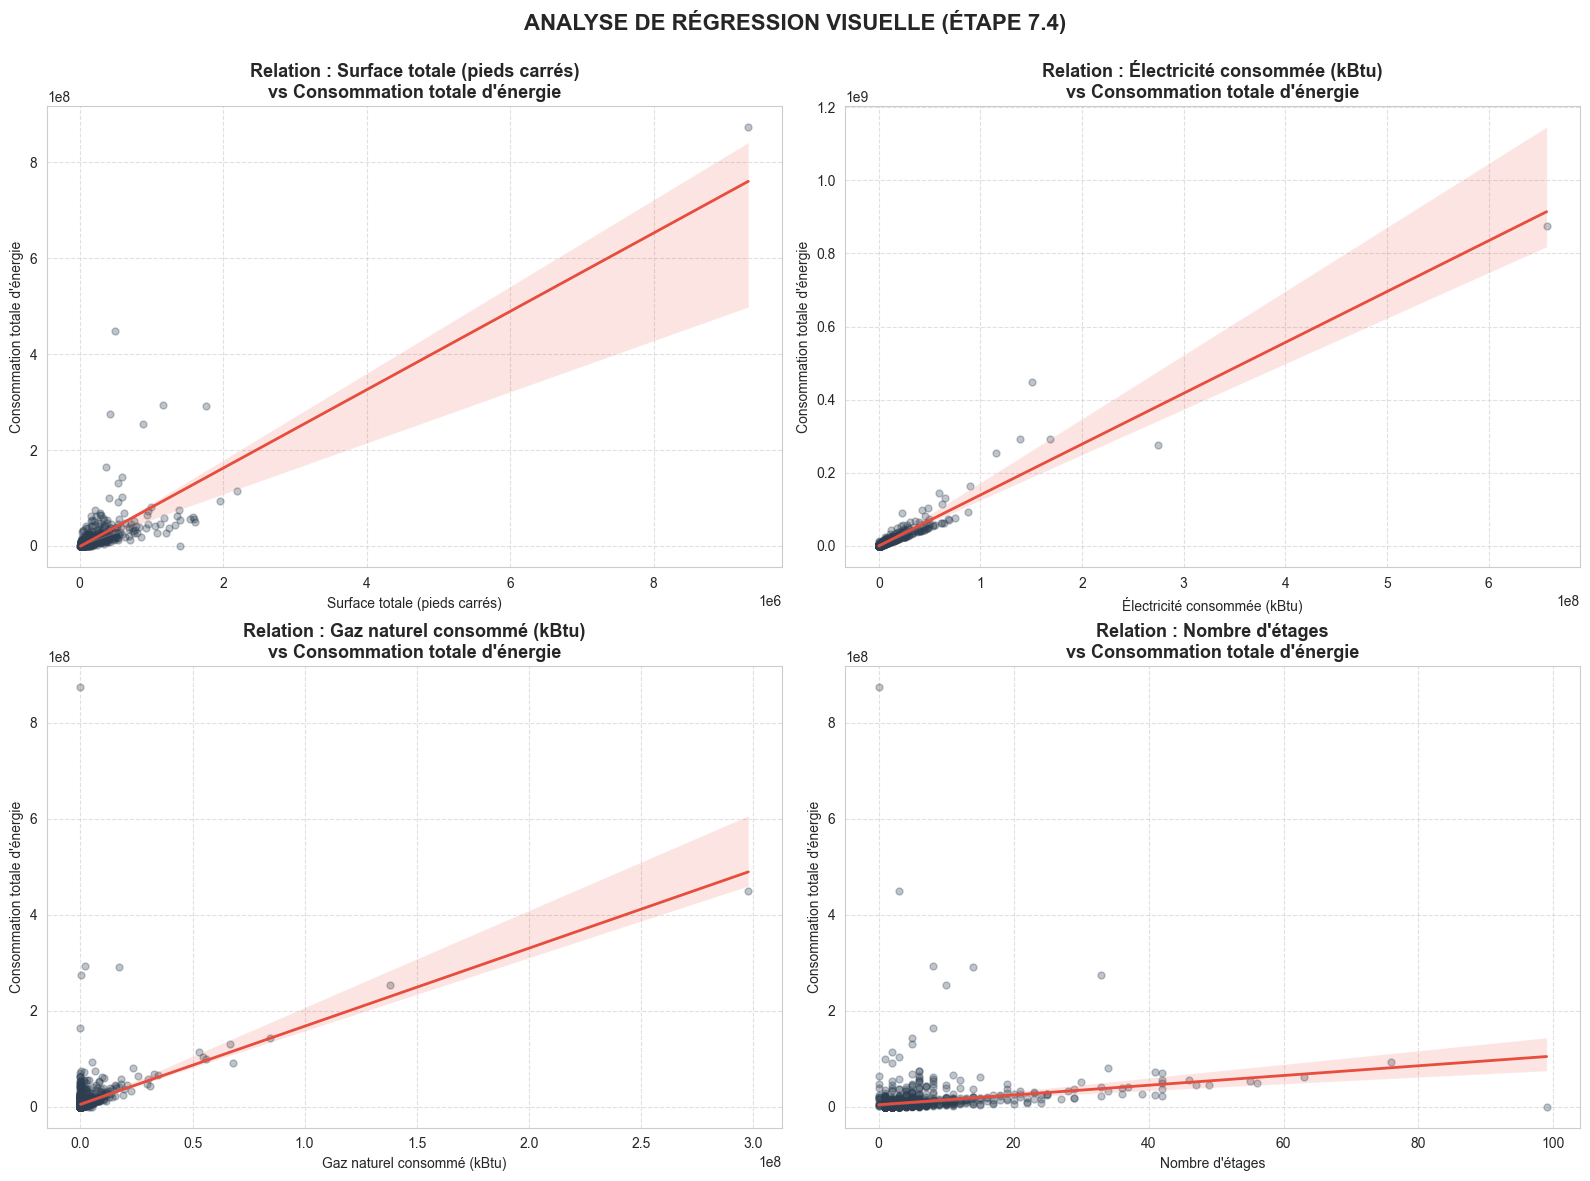

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- CONFIGURATION DE L'ANALYSE ---
# Nous définissons la cible principale du modèle
target = "SiteEnergyUse(kBtu)"

# Sélection des variables clés identifiées par l'analyse métier et de corrélation
# On choisit des variables structurelles et énergétiques non-redondantes
features_a_analyser = [
    "PropertyGFATotal",   # Surface totale (Cause structurelle)
    "Electricity(kBtu)",  # Consommation électrique (Composant)
    "NaturalGas(kBtu)",   # Consommation de gaz (Composant)
    "NumberofFloors"      # Hauteur du bâtiment (Complexité)
]

print(f"📈 Analyse de la relation entre les caractéristiques et la cible : {target}")

# --- PRÉPARATION DES DONNÉES ---
# Gestion hybride Polars/Pandas pour éviter les erreurs AttributeError
if hasattr(building_consumption, "to_pandas"):
    df_viz = building_consumption.to_pandas()
else:
    df_viz = building_consumption.copy()

# --- GÉNÉRATION DES GRAPHIQUES ---
# Création d'une grille de 2x2 pour une comparaison visuelle directe
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features_a_analyser):
    # regplot trace les points (scatter) et la droite de tendance linéaire
    sns.regplot(
        data=df_viz,
        x=col,
        y=target,
        ax=axes[i],
        scatter_kws={'alpha':0.3, 's':25, 'color': '#2c3e50'},
        line_kws={'color':'#e74c3c', 'lw':2} # Ligne de tendance en rouge
    )
    
    # Récupération des noms lisibles depuis votre dictionnaire meta_dict
    nom_x = meta_dict.get(col, col)
    nom_y = meta_dict.get(target, target)
    
    # Personnalisation esthétique de chaque sous-graphique
    axes[i].set_title(f"Relation : {nom_x}\nvs {nom_y}", fontsize=13, fontweight='bold')
    axes[i].set_xlabel(nom_x, fontsize=10)
    axes[i].set_ylabel(nom_y, fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Ajustement automatique de l'espacement pour éviter les chevauchements
plt.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle(f"ANALYSE DE RÉGRESSION VISUELLE (ÉTAPE 7.4)", fontsize=16, fontweight='bold')

plt.show()

## 8. Analyse par Segments et Contexte (Domain Considerations)

## 9. Synthèse et Recommandations Pré-Engineering

# pipeline inicial 

In [ ]:

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# =========================
# 1) Préprocessing 
# =========================
# Suppose que X est un DataFrame pandas
# et y une Series

# Détection auto (sinon mets des listes explicites)
numeric_features = X.select_dtypes(include=["number"]).columns
categorical_features = X.select_dtypes(exclude=["number"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# =========================
# 2) Modèles à comparer
# =========================
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0, epsilon=0.1)
}

# =========================
# 3) Cross-validation + métriques
# =========================
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "r2": "r2",
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

rows = []

print("🤖 MODÉLISATION - Comparaison via Cross-Validation (Pipeline sklearn)\n")

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    print(f"🔄 CV pour {name}...")

    cv_res = cross_validate(
        pipe,
        X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True  # utile pour détecter overfit
    )

    # On remet les métriques en "positif" (car neg_* côté sklearn)
    r2_train_mean = cv_res["train_r2"].mean()
    r2_test_mean  = cv_res["test_r2"].mean()
    r2_test_std   = cv_res["test_r2"].std()

    mae_train_mean = -cv_res["train_mae"].mean()
    mae_test_mean  = -cv_res["test_mae"].mean()
    mae_test_std   = cv_res["test_mae"].std()

    rmse_train_mean = -cv_res["train_rmse"].mean()
    rmse_test_mean  = -cv_res["test_rmse"].mean()
    rmse_test_std   = cv_res["test_rmse"].std()

    overfit_gap = r2_train_mean - r2_test_mean

    print(f"✅ {name}")
    print(f"   R²    train: {r2_train_mean:.4f} | CV: {r2_test_mean:.4f} ± {r2_test_std:.4f}")
    print(f"   MAE   train: {mae_train_mean:.4f} | CV: {mae_test_mean:.4f} ± {mae_test_std:.4f}")
    print(f"   RMSE  train: {rmse_train_mean:.4f} | CV: {rmse_test_mean:.4f} ± {rmse_test_std:.4f}")

    if overfit_gap > 0.10:
        print(f"   ⚠️ Surapprentissage probable (écart R² train-CV = {overfit_gap:.4f})")
    elif overfit_gap < -0.05:
        print("   ⚠️ Sous-apprentissage possible")
    else:
        print("   ✅ Bon équilibre train/CV")
    print()

    rows.append({
        "Modèle": name,
        "R² CV (mean)": r2_test_mean,
        "R² CV (std)": r2_test_std,
        "MAE CV (mean)": mae_test_mean,
        "MAE CV (std)": mae_test_std,
        "RMSE CV (mean)": rmse_test_mean,
        "RMSE CV (std)": rmse_test_std,
        "R² train (mean)": r2_train_mean,
        "Overfit gap (R²)": overfit_gap
    })

comparison_df = pd.DataFrame(rows).sort_values(by="R² CV (mean)", ascending=False)

print("=" * 60)
print("📊 TABLEAU RÉCAPITULATIF (Cross-Validation)")
print("=" * 60)
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]["Modèle"]
print(f"\n🏆 MEILLEUR MODÈLE (selon R² CV mean) : {best_model_name}")
print("\n✅ Comparaison terminée")

# =========================
# 4) Entraîner le meilleur modèle sur TOUT le dataset (optionnel)
# =========================
best_estimator = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", best_estimator)
])

best_pipeline.fit(X, y)

# pipeline preparation 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder  # pip install category-encoders

# ============================================================================
# ÉTAPE 0: PRÉPARATION - Nettoyage qui doit être fait AVANT le pipeline
# ============================================================================
def preparation_initiale(df: pd.DataFrame, target: str = 'SiteEnergyUse(kBtu)') -> tuple:
    """
    Nettoyage qui ne peut pas être fait dans le pipeline sklearn.
    À exécuter UNE SEULE FOIS sur le dataset complet.
    """
    df = df.copy()
    
    # 1.1 Suppression des constantes
    df = df.drop(columns=['DataYear', 'City', 'State'], errors='ignore')
    
    # 1.2 Colonnes avec trop de manquants
    df = df.drop(columns=['Comments', 'Outlier'], errors='ignore')
    
    # 1.3 Identifiants
    df = df.drop(columns=['OSEBuildingID'], errors='ignore')
    
    # 1.4 Redondance électricité (garder kBtu)
    df = df.drop(columns=['Electricity(kWh)'], errors='ignore')
    
    # Séparer X et y
    y = df[target]
    X = df.drop(columns=[target])
    
    return X, y

# ============================================================================
# ÉTAPE 1: DÉFINIR LES COLONNES PAR TYPE
# ============================================================================
def identifier_colonnes(X: pd.DataFrame) -> dict:
    """
    Identifie et catégorise les colonnes selon leur nature.
    """
    # Colonnes numériques continues
    numeriques_continues = [
        'Latitude', 'Longitude', 'YearBuilt', 
        'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
        'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
        'SteamUse(kBtu)', 'Electricity(kBtu)',
        'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'TotalGHGEmissions', 'GHGEmissionsIntensity'
    ]
    
    # Colonnes à transformer en log (énergie et surfaces)
    colonnes_log = [
        'PropertyGFATotal', 'PropertyGFABuilding(s)',
        'LargestPropertyUseTypeGFA',
        'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
        'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
        'TotalGHGEmissions'
    ]
    
    # Colonnes catégorielles
    categorielles_ohe = [
        'PrimaryPropertyType', 'BuildingType',
        'CouncilDistrictCode'  # Faible cardinalité
    ]
    
    categorielles_target = [
        'Neighborhood'  # Haute cardinalité
    ]
    
    # Colonnes avec beaucoup de manquants (>50%)
    colonnes_indicateurs = [
        'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA',
        'ENERGYSTARScore'
    ]
    
    # Filtrer pour ne garder que celles qui existent
    numeriques_continues = [c for c in numeriques_continues if c in X.columns]
    colonnes_log = [c for c in colonnes_log if c in X.columns]
    categorielles_ohe = [c for c in categorielles_ohe if c in X.columns]
    categorielles_target = [c for c in categorielles_target if c in X.columns]
    colonnes_indicateurs = [c for c in colonnes_indicateurs if c in X.columns]
    
    return {
        'numeriques_continues': numeriques_continues,
        'colonnes_log': colonnes_log,
        'categorielles_ohe': categorielles_ohe,
        'categorielles_target': categorielles_target,
        'colonnes_indicateurs': colonnes_indicateurs
    }

# ============================================================================
# ÉTAPE 2: TRANSFORMATEURS PERSONNALISÉS
# ============================================================================

def log_transform(X):
    """Transformation logarithmique avec gestion des négatifs."""
    X = X.copy()
    for col in X.columns:
        if X[col].min() < 0:
            # Décalage pour rendre positif
            decalage = abs(X[col].min()) + 1
            X[col] = np.log1p(X[col] + decalage)
        else:
            X[col] = np.log1p(X[col])
    return X

def winsorize_transform(X, lower=0.01, upper=0.99):
    """Winsorisation (clipping aux quantiles)."""
    X = X.copy()
    for col in X.columns:
        q_low = X[col].quantile(lower)
        q_high = X[col].quantile(upper)
        X[col] = X[col].clip(lower=q_low, upper=q_high)
    return X

def create_features(X):
    """Création de features enrichies."""
    X = X.copy()
    
    # 4.1 Ratios d'efficacité
    if 'TotalGHGEmissions' in X.columns and 'PropertyGFATotal' in X.columns:
        X['GHG_Density'] = X['TotalGHGEmissions'] / (X['PropertyGFATotal'] + 1)
    
    if 'SiteEUI(kBtu/sf)' in X.columns and 'PropertyGFATotal' in X.columns:
        X['EUI_Density'] = X['SiteEUI(kBtu/sf)'] / (X['PropertyGFATotal'] + 1)
    
    # 4.2 Indicateur multi-usage
    if 'SecondLargestPropertyUseTypeGFA' in X.columns:
        X['Multi_Usage'] = (X['SecondLargestPropertyUseTypeGFA'] > 0).astype(int)
    
    # 4.3 Ratio de parking
    if 'PropertyGFAParking' in X.columns and 'PropertyGFATotal' in X.columns:
        X['Parking_Ratio'] = X['PropertyGFAParking'] / (X['PropertyGFATotal'] + 1)
    
    # 4.4 Binning ENERGYSTARScore
    if 'ENERGYSTARScore' in X.columns:
        X['Energy_Category'] = pd.cut(
            X['ENERGYSTARScore'],
            bins=[0, 50, 75, 100],
            labels=['Low', 'Medium', 'High'],
            include_lowest=True
        ).astype(str)
    
    return X

def create_missing_indicators(X, columns_to_flag):
    """Crée des indicateurs de valeurs manquantes."""
    X = X.copy()
    for col in columns_to_flag:
        if col in X.columns:
            X[f'{col}_Manquant'] = X[col].isna().astype(int)
    return X

# ============================================================================
# ÉTAPE 3: CONSTRUCTION DU PIPELINE COMPLET
# ============================================================================

def build_preprocessing_pipeline(X: pd.DataFrame, y: pd.Series = None):
    """
    Construit le pipeline de preprocessing complet.
    
    Paramètres:
    -----------
    X : pd.DataFrame
        Features après préparation initiale
    y : pd.Series, optional
        Target (nécessaire pour TargetEncoder)
    """
    
    # Identifier les colonnes
    cols_info = identifier_colonnes(X)
    
    # ========================================================================
    # PIPELINE POUR COLONNES NUMÉRIQUES AVEC LOG + WINSORISATION
    # ========================================================================
    numeric_log_pipeline = Pipeline(steps=[
        ('log', FunctionTransformer(log_transform, validate=False)),
        ('winsorize', FunctionTransformer(
            lambda X: winsorize_transform(X, lower=0.01, upper=0.99),
            validate=False
        )),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # ========================================================================
    # PIPELINE POUR COLONNES NUMÉRIQUES SANS LOG
    # ========================================================================
    numeric_standard_pipeline = Pipeline(steps=[
        ('winsorize', FunctionTransformer(
            lambda X: winsorize_transform(X, lower=0.01, upper=0.99),
            validate=False
        )),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # ========================================================================
    # PIPELINE POUR CATÉGORIELLES OHE
    # ========================================================================
    from sklearn.preprocessing import OneHotEncoder
    
    categorical_ohe_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='INCONNU')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # ========================================================================
    # PIPELINE POUR CATÉGORIELLES TARGET ENCODING
    # ========================================================================
    categorical_target_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='INCONNU')),
        ('target_enc', TargetEncoder(smoothing=10, min_samples_leaf=20))
    ])
    
    # ========================================================================
    # COLUMN TRANSFORMER
    # ========================================================================
    
    # Colonnes pour chaque pipeline
    cols_log = [c for c in cols_info['colonnes_log'] if c in X.columns]
    cols_standard = [c for c in cols_info['numeriques_continues'] 
                     if c not in cols_log and c in X.columns]
    
    transformers = [
        ('num_log', numeric_log_pipeline, cols_log),
        ('num_standard', numeric_standard_pipeline, cols_standard),
        ('cat_ohe', categorical_ohe_pipeline, cols_info['categorielles_ohe']),
    ]
    
    # Ajouter Target Encoding seulement si y est fourni
    if y is not None and len(cols_info['categorielles_target']) > 0:
        transformers.append(
            ('cat_target', categorical_target_pipeline, cols_info['categorielles_target'])
        )
    
    preprocessor = ColumnTransformer(
        transformers=transformers,
        remainder='drop'  # Ignore les autres colonnes
    )
    
    # ========================================================================
    # PIPELINE FINAL AVEC FEATURE ENGINEERING
    # ========================================================================
    full_pipeline = Pipeline(steps=[
        ('missing_indicators', FunctionTransformer(
            lambda X: create_missing_indicators(X, cols_info['colonnes_indicateurs']),
            validate=False
        )),
        ('feature_creation', FunctionTransformer(create_features, validate=False)),
        ('preprocessing', preprocessor)
    ])
    
    return full_pipeline

# ============================================================================
# ÉTAPE 4: UTILISATION COMPLÈTE
# ============================================================================

# Charger les données
df = pd.read_csv('seattle_energy.csv')

# Préparation initiale (à faire UNE FOIS)
X, y = preparation_initiale(df, target='SiteEnergyUse(kBtu)')

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Construire le pipeline (avec y_train pour TargetEncoder)
preprocessing_pipeline = build_preprocessing_pipeline(X_train, y_train)

# ============================================================================
# ÉTAPE 5: PIPELINE COMPLET AVEC MODÈLES
# ============================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate, KFold

models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=300, 
        max_depth=20,
        min_samples_split=5,
        random_state=42, 
        n_jobs=-1
    ),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0, epsilon=0.1)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "r2": "r2",
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

results = []

print("🤖 MODÉLISATION - Comparaison avec preprocessing complet\n")
print("="*80)

for name, model in models.items():
    # Pipeline complet: preprocessing + modèle
    full_pipe = Pipeline(steps=[
        ("preprocessing", preprocessing_pipeline),
        ("model", model)
    ])
    
    print(f"\n🔄 Cross-Validation pour {name}...")
    
    cv_res = cross_validate(
        full_pipe,
        X_train, y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True
    )
    
    # Métriques
    r2_train = cv_res["train_r2"].mean()
    r2_test = cv_res["test_r2"].mean()
    r2_std = cv_res["test_r2"].std()
    
    mae_train = -cv_res["train_mae"].mean()
    mae_test = -cv_res["test_mae"].mean()
    
    rmse_train = -cv_res["train_rmse"].mean()
    rmse_test = -cv_res["test_rmse"].mean()
    
    overfit_gap = r2_train - r2_test
    
    print(f"✅ {name}")
    print(f"   R²    train: {r2_train:.4f} | CV: {r2_test:.4f} ± {r2_std:.4f}")
    print(f"   MAE   train: {mae_train:.2f} | CV: {mae_test:.2f}")
    print(f"   RMSE  train: {rmse_train:.2f} | CV: {rmse_test:.2f}")
    
    if overfit_gap > 0.10:
        print(f"   ⚠️ Overfitting (gap = {overfit_gap:.4f})")
    else:
        print("   ✅ Bon équilibre")
    
    results.append({
        "Modèle": name,
        "R² CV": r2_test,
        "R² std": r2_std,
        "RMSE CV": rmse_test,
        "Overfit gap": overfit_gap
    })

# ============================================================================
# ÉTAPE 6: RÉSULTATS
# ============================================================================
comparison_df = pd.DataFrame(results).sort_values(by="R² CV", ascending=False)

print("\n" + "="*80)
print("📊 TABLEAU RÉCAPITULATIF")
print("="*80)
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]["Modèle"]
print(f"\n🏆 MEILLEUR MODÈLE : {best_model_name}")

# ============================================================================
# ÉTAPE 7: ENTRAÎNER LE MEILLEUR MODÈLE SUR TOUT LE TRAIN
# ============================================================================
best_estimator = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing_pipeline),
    ("model", best_estimator)
])

print(f"\n🔧 Entraînement final de {best_model_name} sur train complet...")
best_pipeline.fit(X_train, y_train)

# Évaluation sur test
y_pred = best_pipeline.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

r2_final = r2_score(y_test, y_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 PERFORMANCE FINALE SUR TEST SET")
print(f"   R²   : {r2_final:.4f}")
print(f"   RMSE : {rmse_final:.2f} kBtu")

# Sauvegarder
import joblib
joblib.dump(best_pipeline, 'best_model_pipeline.pkl')
print("\n✅ Pipeline complet sauvegardé : 'best_model_pipeline.pkl'")

# configure pipeline 2 

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# =========================
# CONFIGURATION
# =========================
TARGET = 'SiteEnergyUse(kBtu)'  # Variable cible
RANDOM_STATE = 42

# =========================
# 1) CHARGEMENT ET PRÉPARATION INITIALE
# =========================
print("🔄 Chargement des données...")

# Charger le dataset
dataset_url = "2016_Building_Energy_Benchmarking.csv"
df = pd.read_csv(dataset_url)

print(f"✅ Dataset chargé : {df.shape}")
print(f"   Lignes: {df.shape[0]:,} | Colonnes: {df.shape[1]}")

# =========================
# 2) NETTOYAGE INITIAL
# =========================
print("\n🧹 Nettoyage initial...")

# 2.1 Supprimer colonnes constantes
colonnes_constantes = ['DataYear', 'City', 'State']
df.drop(columns=colonnes_constantes, inplace=True, errors='ignore')

# 2.2 Supprimer colonnes avec trop de valeurs manquantes (>95%)
seuil_missing = 0.95
cols_missing = df.columns[df.isnull().mean() > seuil_missing].tolist()
df.drop(columns=cols_missing, inplace=True)

# 2.3 Supprimer identifiants uniques
identifiants = ['OSEBuildingID', 'PropertyName', 'Address', 
                'TaxParcelIdentificationNumber']
df.drop(columns=identifiants, inplace=True, errors='ignore')

# 2.4 Gérer redondance (kWh vs kBtu pour électricité)
if 'Electricity(kWh)' in df.columns:
    df.drop(columns=['Electricity(kWh)'], inplace=True)
if 'NaturalGas(therms)' in df.columns:
    df.drop(columns=['NaturalGas(therms)'], inplace=True)

print(f"✅ Après nettoyage : {df.shape}")

# =========================
# 3) GESTION DES VALEURS MANQUANTES
# =========================
print("\n🔧 Gestion des valeurs manquantes...")

# 3.1 Créer indicateurs pour colonnes avec >50% missing
seuil_indicateur = 0.50
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        continue
    
    missing_pct = df[col].isnull().mean()
    if missing_pct > seuil_indicateur:
        df[f'{col}_Manquant'] = df[col].isnull().astype(int)

# 3.2 Imputation catégorielle
colonnes_cat = df.select_dtypes(include=['object', 'category']).columns
for col in colonnes_cat:
    df[col].fillna('INCONNU', inplace=True)

# 3.3 Imputation numérique avec médiane
colonnes_num = df.select_dtypes(include=[np.number]).columns
colonnes_num = [c for c in colonnes_num if not c.endswith('_Manquant')]

for col in colonnes_num:
    if df[col].isnull().sum() > 0:
        mediane = df[col].median()
        df[col].fillna(mediane, inplace=True)

print(f"✅ Valeurs manquantes restantes: {df.isnull().sum().sum()}")

# =========================
# 4) TRAITEMENT ASYMÉTRIE ET OUTLIERS
# =========================
print("\n📊 Traitement asymétrie et outliers...")

# 4.1 Transformation logarithmique pour colonnes asymétriques
colonnes_log = [
    'SiteEnergyUse(kBtu)', 
    'Electricity(kBtu)', 
    'NaturalGas(kBtu)',
    'PropertyGFATotal',
    'TotalGHGEmissions'
]

for col in colonnes_log:
    if col in df.columns:
        df[f'{col}_log'] = np.log1p(df[col])

# 4.2 Winsorisation (1er et 99e percentile)
colonnes_wins = [c for c in df.select_dtypes(include=[np.number]).columns 
                 if not c.endswith('_log') and not c.endswith('_Manquant')]

for col in colonnes_wins:
    if col in df.columns:
        p01 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        df[f'{col}_wins'] = df[col].clip(lower=p01, upper=p99)

print(f"✅ Transformations appliquées")

# =========================
# 5) CRÉATION DE NOUVELLES FEATURES
# =========================
print("\n🎯 Création de nouvelles features...")

# 5.1 Diversité d'usage
if 'SecondLargestPropertyUseType' in df.columns:
    df['Usage_Diversity'] = (
        (df['SecondLargestPropertyUseType'] != 'INCONNU').astype(int) +
        (df.get('ThirdLargestPropertyUseType', pd.Series(['INCONNU']*len(df))) != 'INCONNU').astype(int)
    )

# 5.2 Ratio de parking
if 'PropertyGFAParking' in df.columns and 'PropertyGFATotal' in df.columns:
    df['Parking_Ratio'] = np.where(
        df['PropertyGFATotal'] > 0,
        df['PropertyGFAParking'] / df['PropertyGFATotal'],
        0
    )

# 5.3 Indicateur parking
if 'PropertyGFAParking' in df.columns:
    df['Has_Parking'] = (df['PropertyGFAParking'] > 0).astype(int)

# 5.4 Âge du bâtiment
if 'YearBuilt' in df.columns:
    df['Building_Age'] = 2016 - df['YearBuilt']

# 5.5 Ratio usage principal
if 'LargestPropertyUseTypeGFA' in df.columns and 'PropertyGFATotal' in df.columns:
    df['Primary_Use_Ratio'] = np.where(
        df['PropertyGFATotal'] > 0,
        df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal'],
        0
    )

print(f"✅ Features créées")

# =========================
# 6) SÉLECTION DE LA CIBLE
# =========================
print("\n🎯 Sélection de la cible...")

# Utiliser version transformée si disponible
if f'{TARGET}_wins' in df.columns:
    target_final = f'{TARGET}_wins'
elif f'{TARGET}_log' in df.columns:
    target_final = f'{TARGET}_log'
else:
    target_final = TARGET

print(f"   Target sélectionnée: {target_final}")

# Vérifier que la cible existe
if target_final not in df.columns:
    raise ValueError(f"❌ Colonne cible '{target_final}' introuvable!")

# Séparer X et y
y = df[target_final].copy()
X = df.drop(columns=[c for c in df.columns if TARGET in c], errors='ignore')

print(f"✅ X: {X.shape} | y: {y.shape}")

# =========================
# 7) ENCODAGE DES CATÉGORIELLES
# =========================
print("\n🔤 Encodage des variables catégorielles...")

# Identifier colonnes catégorielles restantes
colonnes_cat = X.select_dtypes(include=['object', 'category']).columns.tolist()

if colonnes_cat:
    print(f"   Colonnes catégorielles détectées: {len(colonnes_cat)}")
    
    # Target Encoding simple (moyenne globale comme fallback)
    for col in colonnes_cat:
        # Normaliser texte
        X[col] = X[col].astype(str).str.upper().str.strip()
        
        # Calculer moyennes par catégorie
        mapping = df.groupby(col)[target_final].mean().to_dict()
        global_mean = y.mean()
        
        # Mapper avec fallback
        X[f'{col}_Encoded'] = X[col].map(mapping).fillna(global_mean)
        X.drop(columns=[col], inplace=True)
    
    print(f"✅ Encodage terminé")

# =========================
# 8) ÉLIMINATION REDONDANCE
# =========================
print("\n🔍 Élimination des colonnes redondantes...")

# Supprimer colonnes originales si version transformée existe
colonnes_a_supprimer = []
for col in X.columns:
    if f'{col}_log' in X.columns or f'{col}_wins' in X.columns:
        if not col.endswith('_log') and not col.endswith('_wins') and not col.endswith('_Manquant'):
            colonnes_a_supprimer.append(col)

X.drop(columns=colonnes_a_supprimer, inplace=True, errors='ignore')

# Calculer corrélations
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X.drop(columns=to_drop, inplace=True, errors='ignore')

print(f"✅ Colonnes après nettoyage: {X.shape[1]}")

# =========================
# 9) VÉRIFICATION FINALE
# =========================
print("\n✔️ Vérification finale...")

# Vérifier qu'il ne reste que des numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"⚠️  Colonnes non-numériques restantes: {non_numeric}")
    X = X.select_dtypes(include=[np.number])

# Vérifier valeurs manquantes
if X.isnull().sum().sum() > 0:
    print(f"⚠️  {X.isnull().sum().sum()} valeurs manquantes - imputation finale...")
    X.fillna(X.median(), inplace=True)

print(f"✅ Dataset final: X={X.shape}, y={y.shape}")

# =========================
# 10) PREPROCESSING PIPELINE (pour sklearn)
# =========================
print("\n🔄 Configuration du pipeline sklearn...")

# Toutes les colonnes sont numériques maintenant
numeric_features = X.columns.tolist()

# Pipeline de preprocessing
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder="drop"
)

# =========================
# 11) MODÈLES À COMPARER
# =========================
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, 
        max_depth=10,
        random_state=RANDOM_STATE, 
        n_jobs=-1
    ),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0, epsilon=0.1)
}

# =========================
# 12) CROSS-VALIDATION + MÉTRIQUES
# =========================
print("\n🤖 MODÉLISATION - Comparaison via Cross-Validation\n")

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "r2": "r2",
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

rows = []

for name, model in models.items():
    print(f"🔄 Cross-validation pour {name}...")
    
    # Créer pipeline complet
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    # Cross-validation
    cv_res = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True
    )
    
    # Extraire métriques
    r2_train_mean = cv_res["train_r2"].mean()
    r2_test_mean = cv_res["test_r2"].mean()
    r2_test_std = cv_res["test_r2"].std()
    
    mae_train_mean = -cv_res["train_mae"].mean()
    mae_test_mean = -cv_res["test_mae"].mean()
    mae_test_std = cv_res["test_mae"].std()
    
    rmse_train_mean = -cv_res["train_rmse"].mean()
    rmse_test_mean = -cv_res["test_rmse"].mean()
    rmse_test_std = cv_res["test_rmse"].std()
    
    overfit_gap = r2_train_mean - r2_test_mean
    
    # Affichage
    print(f"✅ {name}")
    print(f"   R²    train: {r2_train_mean:.4f} | CV: {r2_test_mean:.4f} ± {r2_test_std:.4f}")
    print(f"   MAE   train: {mae_train_mean:.2f} | CV: {mae_test_mean:.2f} ± {mae_test_std:.2f}")
    print(f"   RMSE  train: {rmse_train_mean:.2f} | CV: {rmse_test_mean:.2f} ± {rmse_test_std:.2f}")
    
    if overfit_gap > 0.10:
        print(f"   ⚠️  Surapprentissage probable (écart R² = {overfit_gap:.4f})")
    elif overfit_gap < -0.05:
        print("   ⚠️  Sous-apprentissage possible")
    else:
        print("   ✅ Bon équilibre train/CV")
    print()
    
    rows.append({
        "Modèle": name,
        "R² CV (mean)": r2_test_mean,
        "R² CV (std)": r2_test_std,
        "MAE CV (mean)": mae_test_mean,
        "MAE CV (std)": mae_test_std,
        "RMSE CV (mean)": rmse_test_mean,
        "RMSE CV (std)": rmse_test_std,
        "R² train (mean)": r2_train_mean,
        "Overfit gap (R²)": overfit_gap
    })

# =========================
# 13) TABLEAU RÉCAPITULATIF
# =========================
comparison_df = pd.DataFrame(rows).sort_values(by="R² CV (mean)", ascending=False)

print("=" * 80)
print("📊 TABLEAU RÉCAPITULATIF (Cross-Validation)")
print("=" * 80)
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]["Modèle"]
print(f"\n🏆 MEILLEUR MODÈLE (selon R² CV) : {best_model_name}")

# =========================
# 14) ENTRAÎNER MODÈLE FINAL SUR TOUT LE DATASET
# =========================
print("\n📦 Entraînement du modèle final sur tout le dataset...")

best_estimator = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", best_estimator)
])

best_pipeline.fit(X, y)

print("✅ Modèle final entraîné et prêt pour les prédictions!")
print("\n" + "="*80)
print("FIN DU PIPELINE")
print("="*80)

# pipeline con categorielles 

In [4]:
"""
================================================================================
PIPELINE DE MODÉLISATION - PRÉDICTION DE CONSOMMATION ÉNERGÉTIQUE
================================================================================
Dataset : Seattle Building Energy Benchmarking 2016
Objectif: Prédire SiteEnergyUse(kBtu) sans data leakage
Auteur  : Rafael CEREZO MARTIN
Date    : 2025
================================================================================
"""

# ==============================================================================
# IMPORTS - Librairies système et utilitaires
# ==============================================================================
import numpy  as np                            # Calculs numériques
import pandas as pd                            # Manipulation de données

# ==============================================================================
# IMPORTS - Outils de modélisation sklearn
# ==============================================================================
from sklearn.model_selection import KFold                # Validation croisée
from sklearn.model_selection import cross_validate       # Métriques CV
from sklearn.pipeline        import Pipeline             # Pipeline ML
from sklearn.compose         import ColumnTransformer    # Transformations
from sklearn.preprocessing   import OneHotEncoder        # Encodage catégoriel
from sklearn.preprocessing   import StandardScaler       # Normalisation
from sklearn.impute          import SimpleImputer        # Imputation

# ==============================================================================
# IMPORTS - Modèles de régression
# ==============================================================================
from sklearn.linear_model    import LinearRegression     # Régression linéaire
from sklearn.ensemble        import RandomForestRegressor # Random Forest
from sklearn.svm             import SVR                  # Support Vector Reg.

# ==============================================================================
# CONFIGURATION GLOBALE
# ==============================================================================
TARGET       = 'SiteEnergyUse(kBtu)'  # Variable cible
RANDOM_STATE = 42                     # Reproductibilité
SEUIL_MISSING      = 0.95             # Seuil suppression colonnes vides
SEUIL_INDICATEUR   = 0.50             # Seuil création indicateurs manquants
SMOOTHING_TE       = 10.0             # Lissage pour Target Encoding
SEUIL_CORRELATION  = 0.95             # Seuil suppression colonnes corrélées

print("\n============================================================================")
print("ÉTAPE 1 - CHARGEMENT DES DONNÉES")
print("============================================================================")

dataset_url = "2016_Building_Energy_Benchmarking.csv"
df          = pd.read_csv(dataset_url)

print(f"✅ Dataset chargé")
print(f"   Lignes..................: {df.shape[0]:,}")
print(f"   Colonnes................: {df.shape[1]}")


print("\n============================================================================")
print("ÉTAPE 2 - NETTOYAGE INITIAL")
print("============================================================================")

# ------------------------------------------------------------------------------
# 2.1. Suppression des colonnes constantes
# ------------------------------------------------------------------------------
colonnes_constantes = ['DataYear', 'City', 'State']
df.drop(columns=colonnes_constantes, inplace=True, errors='ignore')
print(f"✓ Colonnes constantes supprimées: {len(colonnes_constantes)}")

# ------------------------------------------------------------------------------
# 2.2. Suppression des colonnes avec trop de valeurs manquantes (>95%)
# ------------------------------------------------------------------------------
cols_missing = df.columns[df.isnull().mean() > SEUIL_MISSING].tolist()
df.drop(columns=cols_missing, inplace=True)
print(f"✓ Colonnes avec >{SEUIL_MISSING*100}% missing supprimées: "
      f"{len(cols_missing)}")

# ------------------------------------------------------------------------------
# 2.3. Suppression des identifiants uniques
# ------------------------------------------------------------------------------
identifiants = ['OSEBuildingID', 
                'PropertyName', 
                'Address', 
                'TaxParcelIdentificationNumber']
df.drop(columns=identifiants, inplace=True, errors='ignore')
print(f"✓ Identifiants supprimés: {len(identifiants)}")

# ------------------------------------------------------------------------------
# 2.4. Gestion de la redondance (kWh vs kBtu pour électricité)
# ------------------------------------------------------------------------------
if 'Electricity(kWh)' in df.columns:
    df.drop(columns=['Electricity(kWh)'], inplace=True)
if 'NaturalGas(therms)' in df.columns:
    df.drop(columns=['NaturalGas(therms)'], inplace=True)
print(f"✓ Colonnes redondantes supprimées")

print(f"\n✅ Après nettoyage")
print(f"   Shape actuel............: {df.shape}")


print("\n============================================================================")
print("ÉTAPE 3 - GESTION DES VALEURS MANQUANTES")
print("============================================================================")

# ------------------------------------------------------------------------------
# 3.1. Création d'indicateurs pour colonnes avec >50% missing
# ------------------------------------------------------------------------------
nb_indicateurs = 0
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        continue
    
    missing_pct = df[col].isnull().mean()
    if missing_pct > SEUIL_INDICATEUR:
        df[f'{col}_Manquant'] = df[col].isnull().astype(int)
        nb_indicateurs += 1

print(f"✓ Indicateurs de missing créés: {nb_indicateurs}")

# ------------------------------------------------------------------------------
# 3.2. Imputation catégorielle
# ------------------------------------------------------------------------------
colonnes_cat = df.select_dtypes(include=['object', 'category']).columns
for col in colonnes_cat:
    df[col] = df[col].fillna('INCONNU')

print(f"✓ Colonnes catégorielles imputées: {len(colonnes_cat)}")

# ------------------------------------------------------------------------------
# 3.3. Imputation numérique avec médiane
# ------------------------------------------------------------------------------
colonnes_num = df.select_dtypes(include=[np.number]).columns
colonnes_num = [c for c in colonnes_num if not c.endswith('_Manquant')]

nb_imputed = 0
for col in colonnes_num:
    if df[col].isnull().sum() > 0:
        mediane = df[col].median()
        df[col] = df[col].fillna(mediane)
        nb_imputed += 1

print(f"✓ Colonnes numériques imputées: {nb_imputed}")
print(f"\n✅ Valeurs manquantes restantes: {df.isnull().sum().sum()}")


print("\n============================================================================")
print("ÉTAPE 4 - TRAITEMENT ASYMÉTRIE ET OUTLIERS")
print("============================================================================")

# ------------------------------------------------------------------------------
# 4.1. Transformation logarithmique pour colonnes asymétriques
# ------------------------------------------------------------------------------
colonnes_log = [
    'SiteEnergyUse(kBtu)', 
    'Electricity(kBtu)', 
    'NaturalGas(kBtu)',
    'PropertyGFATotal',
    'TotalGHGEmissions'
]

nb_log_transforms = 0
for col in colonnes_log:
    if col in df.columns:
        # Protection contre valeurs négatives (physiquement impossibles)
        df[col] = df[col].clip(lower=0)
        
        # Application log1p (mathématiquement stable)
        df[f'{col}_log'] = np.log1p(df[col])
        
        # Gestion des valeurs infinies (cas rare)
        df[f'{col}_log'] = df[f'{col}_log'].replace([np.inf, -np.inf], np.nan)
        
        # Imputation finale si problème persiste
        if df[f'{col}_log'].isnull().any():
            mediane_log    = df[f'{col}_log'].median()
            df[f'{col}_log'] = df[f'{col}_log'].fillna(mediane_log)
        
        nb_log_transforms += 1

print(f"✓ Transformations logarithmiques: {nb_log_transforms}")

# ------------------------------------------------------------------------------
# 4.2. Winsorisation (1er et 99e percentile)
# ------------------------------------------------------------------------------
colonnes_wins = [c for c in df.select_dtypes(include=[np.number]).columns 
                 if not c.endswith('_log') 
                 and not c.endswith('_Manquant')]

nb_wins = 0
for col in colonnes_wins:
    if col in df.columns:
        p01 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        df[f'{col}_wins'] = df[col].clip(lower=p01, upper=p99)
        nb_wins += 1

print(f"✓ Winsorisations appliquées: {nb_wins}")


print("\n============================================================================")
print("ÉTAPE 5 - CRÉATION DE NOUVELLES FEATURES")
print("============================================================================")

nb_features_created = 0

# ------------------------------------------------------------------------------
# 5.1. Diversité d'usage
# ------------------------------------------------------------------------------
if 'SecondLargestPropertyUseType' in df.columns:
    df['Usage_Diversity'] = (
        (df['SecondLargestPropertyUseType'] != 'INCONNU').astype(int) +
        (df.get('ThirdLargestPropertyUseType', 
                pd.Series(['INCONNU']*len(df))) != 'INCONNU').astype(int)
    )
    nb_features_created += 1

# ------------------------------------------------------------------------------
# 5.2. Ratio de parking
# ------------------------------------------------------------------------------
if ('PropertyGFAParking' in df.columns 
    and 'PropertyGFATotal' in df.columns):
    df['Parking_Ratio'] = np.where(
        df['PropertyGFATotal'] > 0,
        df['PropertyGFAParking'] / df['PropertyGFATotal'],
        0
    )
    nb_features_created += 1

# ------------------------------------------------------------------------------
# 5.3. Indicateur parking
# ------------------------------------------------------------------------------
if 'PropertyGFAParking' in df.columns:
    df['Has_Parking'] = (df['PropertyGFAParking'] > 0).astype(int)
    nb_features_created += 1

# ------------------------------------------------------------------------------
# 5.4. Âge du bâtiment
# ------------------------------------------------------------------------------
if 'YearBuilt' in df.columns:
    df['Building_Age'] = 2016 - df['YearBuilt']
    nb_features_created += 1

# ------------------------------------------------------------------------------
# 5.5. Ratio usage principal
# ------------------------------------------------------------------------------
if ('LargestPropertyUseTypeGFA' in df.columns 
    and 'PropertyGFATotal' in df.columns):
    df['Primary_Use_Ratio'] = np.where(
        df['PropertyGFATotal'] > 0,
        df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal'],
        0
    )
    nb_features_created += 1

print(f"✅ Features créées: {nb_features_created}")


print("\n============================================================================")
print("ÉTAPE 6 - SÉLECTION DE LA CIBLE")
print("============================================================================")

# Utiliser version transformée si disponible
if f'{TARGET}_wins' in df.columns:
    target_final = f'{TARGET}_wins'
elif f'{TARGET}_log' in df.columns:
    target_final = f'{TARGET}_log'
else:
    target_final = TARGET

print(f"Target sélectionnée.........: {target_final}")

# Vérifier existence de la cible
if target_final not in df.columns:
    raise ValueError(f"❌ Colonne cible '{target_final}' introuvable!")

# Séparer X et y
y = df[target_final].copy()
X = df.drop(columns=[c for c in df.columns if TARGET in c], errors='ignore')

print(f"✅ Séparation effectuée")
print(f"   X shape.................: {X.shape}")
print(f"   y shape.................: {y.shape}")


print("\n============================================================================")
print("ÉTAPE 7 - ENCODAGE DES VARIABLES CATÉGORIELLES")
print("============================================================================")

# Identifier colonnes catégorielles restantes
colonnes_cat = X.select_dtypes(include=['object', 'category']).columns.tolist()

if colonnes_cat:
    print(f"Colonnes catégorielles......: {len(colonnes_cat)}")
    
    # --------------------------------------------------------------------------
    # 7.1. Analyser cardinalité pour choisir méthode d'encodage
    # --------------------------------------------------------------------------
    colonnes_ohe          = []
    colonnes_target_encode = []
    
    for col in colonnes_cat:
        n_unique = X[col].nunique()
        if n_unique <= 10:
            colonnes_ohe.append(col)
        else:
            colonnes_target_encode.append(col)
    
    print(f"   → One-Hot Encoding.......: {len(colonnes_ohe)} colonnes")
    print(f"   → Target Encoding........: {len(colonnes_target_encode)} "
          f"colonnes")
    
    # --------------------------------------------------------------------------
    # 7.2. One-Hot Encoding pour basse cardinalité
    # --------------------------------------------------------------------------
    if colonnes_ohe:
        for col in colonnes_ohe:
            dummies = pd.get_dummies(X[col], 
                                     prefix=col, 
                                     drop_first=True, 
                                     dtype=int)
            X = pd.concat([X, dummies], axis=1)
            X.drop(columns=[col], inplace=True)
        print(f"✓ One-Hot Encoding appliqué")
    
    # --------------------------------------------------------------------------
    # 7.3. Target Encoding pour haute cardinalité
    # --------------------------------------------------------------------------
    if colonnes_target_encode:
        for col in colonnes_target_encode:
            # Normalisation des valeurs
            X.loc[:, col] = X[col].astype(str).str.upper().str.strip()
            
            # Calculer moyennes par catégorie avec smoothing
            category_stats = df.groupby(col)[target_final].agg(['mean', 
                                                                 'count'])
            global_mean    = y.mean()
            
            category_stats['smoothed'] = (
                (category_stats['mean'] * category_stats['count'] + 
                 global_mean * SMOOTHING_TE) /
                (category_stats['count'] + SMOOTHING_TE)
            )
            
            # Mapper avec fallback vers moyenne globale
            X[f'{col}_Encoded'] = (X[col]
                                   .map(category_stats['smoothed'])
                                   .fillna(global_mean))
            X.drop(columns=[col], inplace=True)
        
        print(f"✓ Target Encoding appliqué")
    
    print(f"✅ Encodage terminé")


print("\n============================================================================")
print("ÉTAPE 8 - ÉLIMINATION DE LA REDONDANCE")
print("============================================================================")

# ------------------------------------------------------------------------------
# 8.1. Supprimer colonnes originales si version transformée existe
# ------------------------------------------------------------------------------
colonnes_a_supprimer = []
for col in X.columns:
    if (f'{col}_log' in X.columns or f'{col}_wins' in X.columns):
        if (not col.endswith('_log') 
            and not col.endswith('_wins') 
            and not col.endswith('_Manquant')):
            colonnes_a_supprimer.append(col)

X.drop(columns=colonnes_a_supprimer, inplace=True, errors='ignore')
print(f"✓ Colonnes originales supprimées: {len(colonnes_a_supprimer)}")

# ------------------------------------------------------------------------------
# 8.2. Calculer corrélations et supprimer colonnes hautement corrélées
# ------------------------------------------------------------------------------
corr_matrix = X.corr().abs()
upper       = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns 
           if any(upper[column] > SEUIL_CORRELATION)]

X.drop(columns=to_drop, inplace=True, errors='ignore')
print(f"✓ Colonnes corrélées supprimées (>{SEUIL_CORRELATION}): "
      f"{len(to_drop)}")

print(f"\n✅ Features finales: {X.shape[1]}")


print("\n============================================================================")
print("ÉTAPE 9 - VÉRIFICATION FINALE")
print("============================================================================")

# ------------------------------------------------------------------------------
# 9.1. Vérifier qu'il ne reste que des numériques
# ------------------------------------------------------------------------------
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"⚠️  Colonnes non-numériques: {non_numeric}")
    X = X.select_dtypes(include=[np.number])
else:
    print(f"✓ Toutes les colonnes sont numériques")

# ------------------------------------------------------------------------------
# 9.2. Vérifier valeurs manquantes
# ------------------------------------------------------------------------------
nb_missing = X.isnull().sum().sum()
if nb_missing > 0:
    print(f"⚠️  {nb_missing} valeurs manquantes - imputation finale...")
    X.fillna(X.median(), inplace=True)
else:
    print(f"✓ Aucune valeur manquante")

print(f"\n✅ Dataset final validé")
print(f"   X shape.................: {X.shape}")
print(f"   y shape.................: {y.shape}")


print("\n============================================================================")
print("ÉTAPE 10 - CONFIGURATION DU PIPELINE SKLEARN")
print("============================================================================")

# Séparer features numériques et catégorielles RESTANTES
numeric_features     = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Features numériques.........: {len(numeric_features)}")
print(f"Features catégorielles......: {len(categorical_features)}")

# ------------------------------------------------------------------------------
# 10.1. Transformer pour colonnes numériques
# ------------------------------------------------------------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# ------------------------------------------------------------------------------
# 10.2. Transformer pour colonnes catégorielles (si il en reste)
# ------------------------------------------------------------------------------
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first'))
])

# ------------------------------------------------------------------------------
# 10.3. ColumnTransformer combine les deux
# ------------------------------------------------------------------------------
if categorical_features:
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder="drop"
    )
    print("✓ Pipeline avec transformers numériques ET catégoriels")
else:
    # Si toutes les catégorielles ont été encodées manuellement
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features)
        ],
        remainder="drop"
    )
    print("✓ Pipeline avec transformer numérique uniquement")


print("\n============================================================================")
print("ÉTAPE 11 - DÉFINITION DES MODÈLES À COMPARER")
print("============================================================================")

models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, 
        max_depth=10,
        random_state=RANDOM_STATE, 
        n_jobs=-1
    ),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0, epsilon=0.1)
}

print(f"✅ {len(models)} modèles configurés")
for name in models.keys():
    print(f"   • {name}")


print("\n============================================================================")
print("ÉTAPE 12 - CROSS-VALIDATION ET MÉTRIQUES")
print("============================================================================")

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "r2"  : "r2",
    "mae" : "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

rows = []

for name, model in models.items():
    print(f"\n🔄 Cross-validation pour {name}...")
    
    # Créer pipeline complet
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    # Cross-validation
    cv_res = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True
    )
    
    # --------------------------------------------------------------------------
    # Extraire métriques
    # --------------------------------------------------------------------------
    r2_train_mean  = cv_res["train_r2"].mean()
    r2_test_mean   = cv_res["test_r2"].mean()
    r2_test_std    = cv_res["test_r2"].std()
    
    mae_train_mean = -cv_res["train_mae"].mean()
    mae_test_mean  = -cv_res["test_mae"].mean()
    mae_test_std   = cv_res["test_mae"].std()
    
    rmse_train_mean = -cv_res["train_rmse"].mean()
    rmse_test_mean  = -cv_res["test_rmse"].mean()
    rmse_test_std   = cv_res["test_rmse"].std()
    
    overfit_gap = r2_train_mean - r2_test_mean
    
    # --------------------------------------------------------------------------
    # Affichage des résultats
    # --------------------------------------------------------------------------
    print(f"✅ {name}")
    print(f"   R²    train: {r2_train_mean:.4f} | "
          f"CV: {r2_test_mean:.4f} ± {r2_test_std:.4f}")
    print(f"   MAE   train: {mae_train_mean:.2f} | "
          f"CV: {mae_test_mean:.2f} ± {mae_test_std:.2f}")
    print(f"   RMSE  train: {rmse_train_mean:.2f} | "
          f"CV: {rmse_test_mean:.2f} ± {rmse_test_std:.2f}")
    
    # --------------------------------------------------------------------------
    # Diagnostic surapprentissage / sous-apprentissage
    # --------------------------------------------------------------------------
    if overfit_gap > 0.10:
        print(f"   ⚠️  Surapprentissage probable "
              f"(écart R² = {overfit_gap:.4f})")
    elif overfit_gap < -0.05:
        print("   ⚠️  Sous-apprentissage possible")
    else:
        print("   ✅ Bon équilibre train/CV")
    
    # --------------------------------------------------------------------------
    # Stocker résultats pour comparaison
    # --------------------------------------------------------------------------
    rows.append({
        "Modèle"           : name,
        "R² CV (mean)"     : r2_test_mean,
        "R² CV (std)"      : r2_test_std,
        "MAE CV (mean)"    : mae_test_mean,
        "MAE CV (std)"     : mae_test_std,
        "RMSE CV (mean)"   : rmse_test_mean,
        "RMSE CV (std)"    : rmse_test_std,
        "R² train (mean)"  : r2_train_mean,
        "Overfit gap (R²)" : overfit_gap
    })


print("\n============================================================================")
print("ÉTAPE 13 - TABLEAU RÉCAPITULATIF")
print("============================================================================")

comparison_df = pd.DataFrame(rows).sort_values(by="R² CV (mean)", 
                                                ascending=False)

print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]["Modèle"]
print(f"\n🏆 MEILLEUR MODÈLE (selon R² CV): {best_model_name}")


print("\n============================================================================")
print("ÉTAPE 14 - ENTRAÎNEMENT DU MODÈLE FINAL")
print("============================================================================")

best_estimator = models[best_model_name]
best_pipeline  = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", best_estimator)
])

best_pipeline.fit(X, y)

print(f"✅ Modèle final entraîné: {best_model_name}")
print(f"   Prêt pour les prédictions")
print(f"   Usage: best_pipeline.predict(X_new)")

print("\n============================================================================")
print("FIN DU PIPELINE")
print("============================================================================")


ÉTAPE 1 - CHARGEMENT DES DONNÉES
✅ Dataset chargé
   Lignes..................: 3,376
   Colonnes................: 46

ÉTAPE 2 - NETTOYAGE INITIAL
✓ Colonnes constantes supprimées: 3
✓ Colonnes avec >95.0% missing supprimées: 3
✓ Identifiants supprimés: 4
✓ Colonnes redondantes supprimées

✅ Après nettoyage
   Shape actuel............: (3376, 34)

ÉTAPE 3 - GESTION DES VALEURS MANQUANTES
✓ Indicateurs de missing créés: 2
✓ Colonnes catégorielles imputées: 8
✓ Colonnes numériques imputées: 17

✅ Valeurs manquantes restantes: 0

ÉTAPE 4 - TRAITEMENT ASYMÉTRIE ET OUTLIERS
✓ Transformations logarithmiques: 5
✓ Winsorisations appliquées: 25

ÉTAPE 5 - CRÉATION DE NOUVELLES FEATURES
✅ Features créées: 5

ÉTAPE 6 - SÉLECTION DE LA CIBLE
Target sélectionnée.........: SiteEnergyUse(kBtu)_wins
✅ Séparation effectuée
   X shape.................: (3376, 68)
   y shape.................: (3376,)

ÉTAPE 7 - ENCODAGE DES VARIABLES CATÉGORIELLES
Colonnes catégorielles......: 8
   → One-Hot Encoding....

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# =========================
# CONFIGURATION
# =========================
TARGET = 'SiteEnergyUse(kBtu)'  # Variable cible
RANDOM_STATE = 42

# =========================
# 1) CHARGEMENT ET PRÉPARATION INITIALE
# =========================
print("🔄 Chargement des données...")

# Charger le dataset
dataset_url = "2016_Building_Energy_Benchmarking.csv"
df = pd.read_csv(dataset_url)

print(f"✅ Dataset chargé : {df.shape}")
print(f"   Lignes: {df.shape[0]:,} | Colonnes: {df.shape[1]}")

# =========================
# 2) NETTOYAGE INITIAL
# =========================
print("\n🧹 Nettoyage initial...")

# 2.1 Supprimer colonnes constantes
colonnes_constantes = ['DataYear', 'City', 'State']
df.drop(columns=colonnes_constantes, inplace=True, errors='ignore')

# 2.2 Supprimer colonnes avec trop de valeurs manquantes (>95%)
seuil_missing = 0.95
cols_missing = df.columns[df.isnull().mean() > seuil_missing].tolist()
df.drop(columns=cols_missing, inplace=True)

# 2.3 Supprimer identifiants uniques
identifiants = ['OSEBuildingID', 'PropertyName', 'Address', 
                'TaxParcelIdentificationNumber']
df.drop(columns=identifiants, inplace=True, errors='ignore')

# 2.4 Gérer redondance (kWh vs kBtu pour électricité)
if 'Electricity(kWh)' in df.columns:
    df.drop(columns=['Electricity(kWh)'], inplace=True)
if 'NaturalGas(therms)' in df.columns:
    df.drop(columns=['NaturalGas(therms)'], inplace=True)

print(f"✅ Après nettoyage : {df.shape}")

# ==============================================================================
# 3) GESTION DES VALEURS MANQUANTES (VERSION MISE À JOUR)
# ==============================================================================
print("\n🔧 Gestion des valeurs manquantes...")

# 3.1 Créer indicateurs pour colonnes avec >50% missing
seuil_indicateur = 0.50
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        continue
    
    missing_pct = df[col].isnull().mean()
    if missing_pct > seuil_indicateur:
        df[f'{col}_Manquant'] = df[col].isnull().astype(int)

# 3.2 Imputation catégorielle (Syntaxe moderne sans inplace)
colonnes_cat = df.select_dtypes(include=['object', 'category']).columns
for col in colonnes_cat:
    # ✅ Remplacement de fillna(inplace=True) par l'assignation directe
    df[col] = df[col].fillna('INCONNU')

# 3.3 Imputation numérique avec médiane (Syntaxe moderne)
colonnes_num = df.select_dtypes(include=[np.number]).columns
colonnes_num = [c for c in colonnes_num if not c.endswith('_Manquant')]

for col in colonnes_num:
    if df[col].isnull().sum() > 0:
        mediane = df[col].median()
        # ✅ Remplacement de fillna(inplace=True)
        df[col] = df[col].fillna(mediane)

print(f"✅ Valeurs manquantes restantes: {df.isnull().sum().sum()}")

# =========================
# 4) TRAITEMENT ASYMÉTRIE ET OUTLIERS
# =========================
print("\n📊 Traitement asymétrie et outliers...")

# 4.1 Transformation logarithmique pour colonnes asymétriques
colonnes_log = [
    'SiteEnergyUse(kBtu)', 
    'Electricity(kBtu)', 
    'NaturalGas(kBtu)',
    'PropertyGFATotal',
    'TotalGHGEmissions'
]

for col in colonnes_log:
    if col in df.columns:
        # 1. Protection contre les valeurs négatives ou nulles (physiquement impossibles)
        # On remplace les valeurs <= 0 par le minimum positif ou on les clippe à 0
        df[col] = df[col].clip(lower=0)
        
        # 2. Application du log1p avec vérification des NaNs
        # log1p(x) est mathématiquement plus stable que log(1+x)
        df[f'{col}_log'] = np.log1p(df[col])
        
        # 3. Gestion post-calcul des valeurs infinies (cas rare)
        df[f'{col}_log'] = df[f'{col}_log'].replace([np.inf, -np.inf], np.nan)
        
        # 4. Imputation finale si un problème persiste
        if df[f'{col}_log'].isnull().any():
            mediane_log = df[f'{col}_log'].median()
            df[f'{col}_log'] = df[f'{col}_log'].fillna(mediane_log)

print("✅ Transformations logarithmiques stabilisées.")

# 4.2 Winsorisation (1er et 99e percentile)
colonnes_wins = [c for c in df.select_dtypes(include=[np.number]).columns 
                 if not c.endswith('_log') and not c.endswith('_Manquant')]

for col in colonnes_wins:
    if col in df.columns:
        p01 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        df[f'{col}_wins'] = df[col].clip(lower=p01, upper=p99)

print(f"✅ Transformations appliquées")

# =========================
# 5) CRÉATION DE NOUVELLES FEATURES
# =========================
print("\n🎯 Création de nouvelles features...")

# 5.1 Diversité d'usage
if 'SecondLargestPropertyUseType' in df.columns:
    df['Usage_Diversity'] = (
        (df['SecondLargestPropertyUseType'] != 'INCONNU').astype(int) +
        (df.get('ThirdLargestPropertyUseType', pd.Series(['INCONNU']*len(df))) != 'INCONNU').astype(int)
    )

# 5.2 Ratio de parking
if 'PropertyGFAParking' in df.columns and 'PropertyGFATotal' in df.columns:
    df['Parking_Ratio'] = np.where(
        df['PropertyGFATotal'] > 0,
        df['PropertyGFAParking'] / df['PropertyGFATotal'],
        0
    )

# 5.3 Indicateur parking
if 'PropertyGFAParking' in df.columns:
    df['Has_Parking'] = (df['PropertyGFAParking'] > 0).astype(int)

# 5.4 Âge du bâtiment
if 'YearBuilt' in df.columns:
    df['Building_Age'] = 2016 - df['YearBuilt']

# 5.5 Ratio usage principal
if 'LargestPropertyUseTypeGFA' in df.columns and 'PropertyGFATotal' in df.columns:
    df['Primary_Use_Ratio'] = np.where(
        df['PropertyGFATotal'] > 0,
        df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal'],
        0
    )

print(f"✅ Features créées")

# =========================
# 6) SÉLECTION DE LA CIBLE
# =========================
print("\n🎯 Sélection de la cible...")

# Utiliser version transformée si disponible
if f'{TARGET}_wins' in df.columns:
    target_final = f'{TARGET}_wins'
elif f'{TARGET}_log' in df.columns:
    target_final = f'{TARGET}_log'
else:
    target_final = TARGET

print(f"   Target sélectionnée: {target_final}")

# Vérifier que la cible existe
if target_final not in df.columns:
    raise ValueError(f"❌ Colonne cible '{target_final}' introuvable!")

# Séparer X et y
y = df[target_final].copy()
X = df.drop(columns=[c for c in df.columns if TARGET in c], errors='ignore')

print(f"✅ X: {X.shape} | y: {y.shape}")

# =========================
# 7) ENCODAGE DES CATÉGORIELLES
# =========================
print("\n🔤 Encodage des variables catégorielles...")

# Identifier colonnes catégorielles restantes
colonnes_cat = X.select_dtypes(include=['object', 'category']).columns.tolist()

if colonnes_cat:
    print(f"   Colonnes catégorielles détectées: {len(colonnes_cat)}")
    
    # Analyser cardinalité pour choisir la méthode d'encodage
    colonnes_ohe = []
    colonnes_target_encode = []
    
    for col in colonnes_cat:
        n_unique = X[col].nunique()
        if n_unique <= 10:
            colonnes_ohe.append(col)
        else:
            colonnes_target_encode.append(col)
    
    print(f"   → One-Hot Encoding: {len(colonnes_ohe)} colonnes")
    print(f"   → Target Encoding: {len(colonnes_target_encode)} colonnes")
    
    # One-Hot Encoding pour basse cardinalité
    if colonnes_ohe:
        for col in colonnes_ohe:
            dummies = pd.get_dummies(X[col], prefix=col, drop_first=True, dtype=int)
            X = pd.concat([X, dummies], axis=1)
            X.drop(columns=[col], inplace=True)
    
    # Target Encoding pour haute cardinalité
    if colonnes_target_encode:
        for col in colonnes_target_encode:
            # ✅ Utiliser .loc pour éviter le SettingWithCopyWarning
            X.loc[:, col] = X[col].astype(str).str.upper().str.strip()
            
            # Calculer moyennes par catégorie avec smoothing
            category_stats = df.groupby(col)[target_final].agg(['mean', 'count'])
            global_mean = y.mean()
            smoothing = 10.0
            
            category_stats['smoothed'] = (
                (category_stats['mean'] * category_stats['count'] + global_mean * smoothing) /
                (category_stats['count'] + smoothing)
            )
            
            # Mapper avec fallback
            X[f'{col}_Encoded'] = X[col].map(category_stats['smoothed']).fillna(global_mean)
            X.drop(columns=[col], inplace=True)
    
    print(f"✅ Encodage terminé")

# =========================
# 8) ÉLIMINATION REDONDANCE
# =========================
print("\n🔍 Élimination des colonnes redondantes...")

# Supprimer colonnes originales si version transformée existe
colonnes_a_supprimer = []
for col in X.columns:
    if f'{col}_log' in X.columns or f'{col}_wins' in X.columns:
        if not col.endswith('_log') and not col.endswith('_wins') and not col.endswith('_Manquant'):
            colonnes_a_supprimer.append(col)

X.drop(columns=colonnes_a_supprimer, inplace=True, errors='ignore')

# Calculer corrélations
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X.drop(columns=to_drop, inplace=True, errors='ignore')

print(f"✅ Colonnes après nettoyage: {X.shape[1]}")

# =========================
# 9) VÉRIFICATION FINALE
# =========================
print("\n✔️ Vérification finale...")

# Vérifier qu'il ne reste que des numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"⚠️  Colonnes non-numériques restantes: {non_numeric}")
    X = X.select_dtypes(include=[np.number])

# Vérifier valeurs manquantes
if X.isnull().sum().sum() > 0:
    print(f"⚠️  {X.isnull().sum().sum()} valeurs manquantes - imputation finale...")
    X.fillna(X.median(), inplace=True)

print(f"✅ Dataset final: X={X.shape}, y={y.shape}")

# =========================
# 10) PREPROCESSING PIPELINE (pour sklearn)
# =========================
print("\n🔄 Configuration du pipeline sklearn...")

# Séparer features numériques et catégorielles RESTANTES après encodage manuel
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"   Features numériques: {len(numeric_features)}")
print(f"   Features catégorielles restantes: {len(categorical_features)}")

# Transformer pour colonnes numériques
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transformer pour colonnes catégorielles (si il en reste)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first'))
])

# ColumnTransformer combine les deux
if categorical_features:
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder="drop"
    )
    print("   ✅ Pipeline avec transformers numériques ET catégoriels")
else:
    # Si toutes les catégorielles ont été encodées manuellement
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features)
        ],
        remainder="drop"
    )
    print("   ✅ Pipeline avec transformer numérique uniquement")

# =========================
# 11) MODÈLES À COMPARER
# =========================
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, 
        max_depth=10,
        random_state=RANDOM_STATE, 
        n_jobs=-1
    ),
    "SVR (RBF)": SVR(kernel="rbf", C=1.0, epsilon=0.1)
}

# =========================
# 12) CROSS-VALIDATION + MÉTRIQUES
# =========================
print("\n🤖 MODÉLISATION - Comparaison via Cross-Validation\n")

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "r2": "r2",
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

rows = []

for name, model in models.items():
    print(f"🔄 Cross-validation pour {name}...")
    
    # Créer pipeline complet
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    # Cross-validation
    cv_res = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True
    )
    
    # Extraire métriques
    r2_train_mean = cv_res["train_r2"].mean()
    r2_test_mean = cv_res["test_r2"].mean()
    r2_test_std = cv_res["test_r2"].std()
    
    mae_train_mean = -cv_res["train_mae"].mean()
    mae_test_mean = -cv_res["test_mae"].mean()
    mae_test_std = cv_res["test_mae"].std()
    
    rmse_train_mean = -cv_res["train_rmse"].mean()
    rmse_test_mean = -cv_res["test_rmse"].mean()
    rmse_test_std = cv_res["test_rmse"].std()
    
    overfit_gap = r2_train_mean - r2_test_mean
    
    # Affichage
    print(f"✅ {name}")
    print(f"   R²    train: {r2_train_mean:.4f} | CV: {r2_test_mean:.4f} ± {r2_test_std:.4f}")
    print(f"   MAE   train: {mae_train_mean:.2f} | CV: {mae_test_mean:.2f} ± {mae_test_std:.2f}")
    print(f"   RMSE  train: {rmse_train_mean:.2f} | CV: {rmse_test_mean:.2f} ± {rmse_test_std:.2f}")
    
    if overfit_gap > 0.10:
        print(f"   ⚠️  Surapprentissage probable (écart R² = {overfit_gap:.4f})")
    elif overfit_gap < -0.05:
        print("   ⚠️  Sous-apprentissage possible")
    else:
        print("   ✅ Bon équilibre train/CV")
    print()
    
    rows.append({
        "Modèle": name,
        "R² CV (mean)": r2_test_mean,
        "R² CV (std)": r2_test_std,
        "MAE CV (mean)": mae_test_mean,
        "MAE CV (std)": mae_test_std,
        "RMSE CV (mean)": rmse_test_mean,
        "RMSE CV (std)": rmse_test_std,
        "R² train (mean)": r2_train_mean,
        "Overfit gap (R²)": overfit_gap
    })

# =========================
# 13) TABLEAU RÉCAPITULATIF
# =========================
comparison_df = pd.DataFrame(rows).sort_values(by="R² CV (mean)", ascending=False)

print("=" * 80)
print("📊 TABLEAU RÉCAPITULATIF (Cross-Validation)")
print("=" * 80)
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]["Modèle"]
print(f"\n🏆 MEILLEUR MODÈLE (selon R² CV) : {best_model_name}")

# =========================
# 14) ENTRAÎNER MODÈLE FINAL SUR TOUT LE DATASET
# =========================
print("\n📦 Entraînement du modèle final sur tout le dataset...")

best_estimator = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", best_estimator)
])

best_pipeline.fit(X, y)

print("✅ Modèle final entraîné et prêt pour les prédictions!")
print("\n" + "="*80)
print("FIN DU PIPELINE")
print("="*80)

🔄 Chargement des données...
✅ Dataset chargé : (3376, 46)
   Lignes: 3,376 | Colonnes: 46

🧹 Nettoyage initial...
✅ Après nettoyage : (3376, 34)

🔧 Gestion des valeurs manquantes...
✅ Valeurs manquantes restantes: 0

📊 Traitement asymétrie et outliers...
✅ Transformations logarithmiques stabilisées.
✅ Transformations appliquées

🎯 Création de nouvelles features...
✅ Features créées

🎯 Sélection de la cible...
   Target sélectionnée: SiteEnergyUse(kBtu)_wins
✅ X: (3376, 68) | y: (3376,)

🔤 Encodage des variables catégorielles...
   Colonnes catégorielles détectées: 8
   → One-Hot Encoding: 2 colonnes
   → Target Encoding: 6 colonnes
✅ Encodage terminé

🔍 Élimination des colonnes redondantes...
✅ Colonnes après nettoyage: 44

✔️ Vérification finale...
⚠️  Colonnes non-numériques restantes: ['DefaultData']
✅ Dataset final: X=(3376, 43), y=(3376,)

🔄 Configuration du pipeline sklearn...
   Features numériques: 43
   Features catégorielles restantes: 0
   ✅ Pipeline avec transformer numériq